# Roman Redshift Analysis

## Roman Parameters and Requirements
https://roman.gsfc.nasa.gov/science/technical_resources.html

## Table of Contents

1. Setup
    1. [Import Python modules](#Import-Python-modules)  
    2. [Python Helper Functions](#Python-Helper-Functions)
    3. [Path to my simulation directories](#Path-to-my-simulation-directories)
2. [Read SExtractor Photometry of Direct Images](#Read-SExtractor-Photometry-of-Direct-Images)
3. [Check simulation](#Check-simulation)
4. [Inspect Redshift Fitting Results](#Inspect-Redshift-Fitting-Results)

[top](#Table-of-Contents)

In [1]:
%matplotlib inline

In [49]:
import importlib
importlib.reload(grizli_functions)

NameError: name 'grizli_functions' is not defined

In [48]:
import importlib
importlib.reload(grizli_analysis)

<module 'grizli_analysis' from '/home/gwalth/python.linux/dev/grizli_analysis.py'>

## Import Python modules
[top](#Table-of-Contents)

In [32]:
import os,sys
#import glob
#from collections import OrderedDict

import matplotlib as mpl    
import matplotlib.pyplot as plt

#from IPython.display import Image

mpl.rcParams['figure.figsize'] = (10.0, 6.0)
#mpl.rcParams['font.size'] = 14
mpl.rcParams['font.size'] = 24

mpl.rcParams['savefig.dpi'] = 72

import numpy as np

import astropy
#import astropy.io.fits as pyfits
from astropy.table import Table, join, vstack
import astropy.units as u
#from astropy.coordinates import SkyCoord

import grizli

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

#import time
#import pickle
#import gc

# display_grizli
#from grizli import multifit

print('\n Python version: ', sys.version)
print('\n Grizli version: ', grizli.__version__)
print('\n Astropy version: ', astropy.__version__)


 Python version:  3.9.16 (main, Jan 11 2023, 10:02:19) 
[Clang 14.0.6 ]

 Grizli version:  1.6.0.dev43

 Astropy version:  5.2.1


In [ ]:
dir()

## Python Helper Functions

In [3]:
import grizli_analysis
from grizli_analysis import display_grizli
from grizli_analysis import check_primers
from grizli_analysis import check_phot, check_redshift_fits
from grizli_analysis import check_single_phot, check_roll_redshift_fits
from grizli_analysis import build_all_tables, build_roll_tables, build_grp_tables
from grizli_analysis import plot_redshifts, plot_redshifts2
from grizli_analysis import sample_numbers, sample_numbers2, sample_numbers3
from grizli_analysis import emline_bar_chart, emline_bar_chart2
from grizli_analysis import sn_dz_plot, sn_dz_hist2d_plot

`import jwst` failed so JWST processing will not work!


These will eventually be replaced by grizli_functions library

In [4]:
emlines = [["OVI",          1038.0],             # 0                                                                                                      
           ["Ly$\\alpha$",  1215.67],            # 1                                                                                                      
           ["CIV",          1550.0],             # 2                                                                                                  
           ["CIII]",        1909.],              # 3                                                                                                  
           ["CII]",         2327.],              # 4                                                                                                  
           ["MgII",         2796.4],             # 5                                                                                                  
           ["MgII",         2803.5],             # 6                                                                                                  
           ["NeV",          3326.],              # 7                                                                                                  
           ["[OII]",        3727.],   # O2       # 8                                                                                                  
           ["[NeIII]",      3868.7],             # 9                                                                                                  
           ["H$\gamma$",    4340.5],  # Hg       # 10                                                                                                    
           ["[OIII]",       4363.0],  # O31      # 11                                                                                                 
           ["H$\\beta$",    4861.3],  # Hb       # 12                                                                                                     
           ["[OIII]",       4959.0],  # O32      # 13                                                                                                 
           ["[OIII]",       5007.0],  # O33      # 14                                                                                                 
           ["[NII]",        6548.1],             # 15                                                                                                 
           ["H$\\alpha$",   6562.8],  # Ha       # 16                                                                                                     
           ["[NII]",        6583.0],             # 17                                                                                                 
           ["[SII]",        6717.0],             # 18                                                                                                 
           ["[SII]",        6731.0],             # 19
           ["[SIII]",       9069.0],             
           ["[SIII]",       9545.0],
           ["P$\\delta$",  10049.8],  # Pd       # 20                                                                                                     
           ["P$\\gamma$",  10938.0],  # Pg       # 21                                                                                                     
           ["P$\\beta$",   12818.1],  # Pb       # 22                                                                                                     
           ["P$\\alpha$",  18750.1],  # Pa       # 23                                                                                                     
           ["Br$\\delta$", 19440.0],  # Br-d (wikipedia, not exact)                                                                                   
           ["Br$\\gamma$", 21660.0],  # Br-g (wikipedia, not exact)                                                                                   
           ["Br$\\beta$",  26250.0],  # Br-b (wikipedia, not exact)                                                                                   
           ["Br$\\alpha$", 40510.0],  # Br-a (wikipedia, not exact)                                                                                   
          ]                                                                                                                                           
                                                                                                                                                      
# http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/hydspec.html                                                                                      
# http://articles.adsabs.harvard.edu//full/1934ApJ....80...19M/0000022.000.html

## Start checks here

In [ ]:
dir()

In [8]:
#root = "hlss_single"
root = "hlss_single_v5"
#HOME_PATH = "/home/gwalth/data/Roman/grizli/sims"
HOME_PATH = "/Users/gwalth/data/Roman/grizli/sims"
#LOCAL_PATH = "/home/gwalth/data/Roman/grizli/sims"
#LOCAL_PATH = "/local/RomanSims/grizli/sims"
LOCAL_PATH = "/Users/gwalth/data/Roman/grizli/sims"


In [6]:
#check_primers(root = "sim_v3", PREP_PATH = "Prep/field_0018")
#check_primers(root = "hlss") 
#check_primers(root = "hlss_single") 
check_primers(root = "hlss_single_v5", 
              HOME_PATH=HOME_PATH, 
              LOCAL_PATH=LOCAL_PATH, 
              PREP_PATH = "Prep/",
              glob_dir="field*") 

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /local/RomanSims/grizli/sims
cygnusd
['field_0001/Euclid_Roman_4deg2_field_0001.fits', 'field_0002/Euclid_Roman_4deg2_field_0002.fits', 'field_0003/Euclid_Roman_4deg2_field_0003.fits', 'field_0004/Euclid_Roman_4deg2_field_0004.fits', 'field_0005/Euclid_Roman_4deg2_field_0005.fits', 'field_0006/Euclid_Roman_4deg2_field_0006.fits', 'field_0007/Euclid_Roman_4deg2_field_0007.fits', 'field_0017/Euclid_Roman_4deg2_field_0017.fits', 'field_0018/Euclid_Roman_4deg2_field_0018.fits', 'field_0019/Euclid_Roman_4deg2_field_0019.fits', 'field_0020/Euclid_Roman_4deg2_field_0020.fits', 'field_0022/Euclid_Roman_4deg2_field_0022.fits', 'field_0023/Euclid_Roman_4deg2_field_0023.fits', 'field_0033/Euclid_Roman_4deg2_field_0033.fits', 'field_0034/Euclid_Roman_4deg2_field_0034.fits', 'field_0035/Euclid_Roman_4deg2_field_0035.fits', 'field_0036/Euclid_Roman_4deg2_field_0036.fits', 'field_0037/Euclid_Roman_4deg2_field_0037.fits', 'field_0038/Eucli

In [7]:
#check_single_phot(root = "hlss", cat = "hlss_phot.fits", verb=1)
#check_single_phot(root = "hlss_single", cat = "hlss_phot.fits", verb=1)
#check_phot(root = "sim_v3",
#           HOME_PATH=HOME_PATH, 
#           LOCAL_PATH=LOCAL_PATH,
#           EXTRACT_PATH = "Extraction/",
#           glob_dir="field*")
check_phot(root = "hlss_single_v5",
           HOME_PATH=HOME_PATH, 
           LOCAL_PATH=LOCAL_PATH,
           EXTRACT_PATH = "Extractions/",
           cat = "hlss_phot.fits",
           glob_dir="field*")

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /local/RomanSims/grizli/sims
cygnusd
Processing field_0001
hlss_phot.fits
2255
['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_ape

2198
['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_a

2182
['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_a

2257
['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_a

In [8]:
#check_redshift_fits(root = "sim_v3")
#check_roll_redshift_fits(root = "hlss", 
#                         LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")
#check_roll_redshift_fits(root = "hlss_single", 
#                         prefix="hlss", 
#                         LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")
check_redshift_fits(root = "hlss_single_v5", 
                    prefix="hlss",
                    EXTRACT_PATH = "Extractions/",
                    HOME_PATH=HOME_PATH, 
                    LOCAL_PATH=LOCAL_PATH)

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /local/RomanSims/grizli/sims
cygnusd

Processing field_0001
Find ids of all the extracted objects
N = 1814
Load redshift FITS files
['ID', 'RA', 'DEC', 'REDSHIFT', 'NUMLINES', 'LINE001', 'FLUX001', 'ERR001', 'LINE002', 'FLUX002', 'ERR002', 'LINE003', 'FLUX003', 'ERR003', 'LINE004', 'FLUX004', 'ERR004', 'LINE005', 'FLUX005', 'ERR005', 'CHIMIN', 'DOF', 'Z02', 'Z16', 'Z50', 'Z84', 'Z97', 'ZWIDTH1', 'ZWIDTH2', 'Z_RISK', 'MIN_RISK', 'Z_MAP', 'GAM_LOSS', 'FIELD']
Time to load FITS files and create Table 6.2 seconds

Processing field_0002
Find ids of all the extracted objects
N = 1801
Load redshift FITS files
['ID', 'RA', 'DEC', 'REDSHIFT', 'NUMLINES', 'LINE001', 'FLUX001', 'ERR001', 'LINE002', 'FLUX002', 'ERR002', 'LINE003', 'FLUX003', 'ERR003', 'LINE004', 'FLUX004', 'ERR004', 'LINE005', 'FLUX005', 'ERR005', 'CHIMIN', 'DOF', 'Z02', 'Z16', 'Z50', 'Z84', 'Z97', 'ZWIDTH1', 'ZWIDTH2', 'Z_RISK', 'MIN_RISK', 'Z_MAP', 'GAM_LOSS', 'FIELD

['ID', 'RA', 'DEC', 'REDSHIFT', 'NUMLINES', 'LINE001', 'FLUX001', 'ERR001', 'LINE002', 'FLUX002', 'ERR002', 'LINE003', 'FLUX003', 'ERR003', 'LINE004', 'FLUX004', 'ERR004', 'LINE005', 'FLUX005', 'ERR005', 'CHIMIN', 'DOF', 'Z02', 'Z16', 'Z50', 'Z84', 'Z97', 'ZWIDTH1', 'ZWIDTH2', 'Z_RISK', 'MIN_RISK', 'Z_MAP', 'GAM_LOSS', 'FIELD']
Time to load FITS files and create Table 5.5 seconds

Processing field_0038
Find ids of all the extracted objects
N = 1699
Load redshift FITS files
['ID', 'RA', 'DEC', 'REDSHIFT', 'NUMLINES', 'LINE001', 'FLUX001', 'ERR001', 'LINE002', 'FLUX002', 'ERR002', 'LINE003', 'FLUX003', 'ERR003', 'LINE004', 'FLUX004', 'ERR004', 'LINE005', 'FLUX005', 'ERR005', 'CHIMIN', 'DOF', 'Z02', 'Z16', 'Z50', 'Z84', 'Z97', 'ZWIDTH1', 'ZWIDTH2', 'Z_RISK', 'MIN_RISK', 'Z_MAP', 'GAM_LOSS', 'FIELD']
Time to load FITS files and create Table 5.6 seconds

Processing field_0039
Find ids of all the extracted objects
N = 1663
Load redshift FITS files
['ID', 'RA', 'DEC', 'REDSHIFT', 'NUMLINES', 

Time to process a single field is 108 seconds

In [9]:
#all_match_tbl,all_match_clean_tbl = build_all_tables(verb=1)
#all_match_tbl,all_match_clean_tbl = build_roll_tables(root="hlss", verb=1,
#                                                      LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")                                                      
#all_match_tbl,all_match_clean_tbl = build_roll_tables(root="hlss_single", prefix="hlss", verb=1,
#                                                      LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")

all_match_tables,all_match_clean_tables = build_grp_tables(root="hlss_single_v5",                     
                                                           prefix="hlss",
                                                           EXTRACT_PATH = "Extractions/",
                                                           HOME_PATH=HOME_PATH,
                                                           cat = "hlss_phot.fits",
                                                           LOCAL_PATH=LOCAL_PATH)

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /local/RomanSims/grizli/sims
cygnusd
['/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0001', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0002', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0003', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0004', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0005', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0006', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0007', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0017', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0018', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0019', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0020', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/field_0022', '/local/RomanSims/grizli/sims/hlss_single_v5/Extractions/fi

2023-02-15 13:36:24,997 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:36:25,006 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(





Files loaded - 1.72 sec.
Number of FLTs:
1
ids =
[5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 151, 152, 153, 156, 157, 159, 160, 161, 163, 164, 165, 166, 168, 169, 170, 172, 174, 175, 176, 177, 178, 181, 182, 183, 184, 185, 186, 188, 190, 192, 193, 194, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 244, 245, 246, 247, 248, 250, 251, 254, 255, 256, 257, 258

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  5 9.044858620005417 -0.9996439647109865 ...     0.15 field_0001
  6 9.017391117271757 -0.9996183444360788 ...     0.15 field_0001
  7 9.091293565715928  -0.999445178683397 ...     0.15 field_0001
  8 9.025723356767166 -0.9995245975033157 ...     0.15 field_0001
 10 9.047557835495038 -0.9992958779632529 ...     0.15 field_0001
 12 9.062225126193674  -0.999130726780085 ...     0.15 field_0001
 13 9.045331591384738 -0.9993439429605363 ...     0.15 field_0001
 14  9.00619986641582  -0.999188270833573 ...     0.15 field_0001
 15  9.00083325419472 -0.9991362009254227 ...     0.15 field_0001
 16 9.092133793474202 -0.9990742756147708 ...     0.15 field_0001
 id        thresh        npix ...       bkg_aper_6       mask_aper_6
                              ...          uJy                      
--- -------------------- ---- ... ---------------------- -----------
 

2023-02-15 13:36:32,070 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:36:32,074 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.96 sec.
Number of FLTs:
1
ids =
[4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 55, 56, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 92, 94, 95, 96, 99, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 120, 122, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136, 137, 139, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 155, 156, 158, 159, 160, 161, 162, 164, 166, 167, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 196, 197, 198, 199, 201, 202, 203, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 242, 243, 244, 246, 248, 249, 250, 251, 252, 254, 256, 257, 258, 259, 260, 261, 262, 263, 264, 2

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  4   9.1154525690352 -0.8748845622078538 ...     0.15 field_0002
  5 9.105607183881888  -0.874832448992138 ...     0.15 field_0002
  6 9.060961867826256 -0.8748382352625492 ...     0.15 field_0002
  7 9.018514342776067 -0.8747079349255116 ...     0.15 field_0002
  9 9.097211773347896  -0.874568943960015 ...     0.15 field_0002
 10  9.01156789241976 -0.8744667386154539 ...     0.15 field_0002
 12 9.115957802748751 -0.8744282019041576 ...     0.15 field_0002
 13 9.068967149129763 -0.8745042159915438 ...     0.15 field_0002
 14 9.040581678444742 -0.8742258788633649 ...     0.15 field_0002
 15 9.023513676618833 -0.8745615767040332 ...     0.15 field_0002
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- -------------------- ---- ... ----------- ----

2023-02-15 13:36:39,463 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:36:39,467 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.97 sec.
Number of FLTs:
1
ids =
[1, 3, 4, 5, 6, 8, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 83, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 119, 120, 121, 124, 126, 127, 128, 131, 133, 134, 136, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1 9.092218349278667 -0.7498971300468488 ...     0.15 field_0003
  3 9.104433739955937 -0.7497383984331989 ...     0.15 field_0003
  4 9.081070652671352 -0.7498095291380928 ...     0.15 field_0003
  5 9.028295522618386 -0.7496753645073152 ...     0.15 field_0003
  6 9.075465435115424 -0.7496604698473344 ...     0.15 field_0003
  8 9.015155084503293 -0.7494153075936165 ...     0.15 field_0003
 11 9.009934374806319 -0.7493196690531201 ...     0.15 field_0003
 12  9.07330486532089 -0.7491714660717486 ...     0.15 field_0003
 13 9.063201665655448 -0.7493953318702975 ...     0.15 field_0003
 14 9.074135025413769 -0.7492438953005377 ...     0.15 field_0003
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:36:45,812 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:36:45,816 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.93 sec.
Number of FLTs:
1
ids =
[2, 3, 4, 6, 9, 10, 11, 12, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 36, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 54, 55, 56, 58, 59, 62, 63, 65, 66, 67, 68, 69, 71, 73, 74, 76, 77, 79, 80, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 185, 186, 187, 188, 191, 192, 193, 195, 197, 198, 199, 200, 202, 203, 204, 205, 206, 208, 210, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.056131360911827 -0.6245467633001343 ...     0.15 field_0004
  3 9.015703295188567 -0.6246371133248838 ...     0.15 field_0004
  4 9.051099735337177 -0.6244216302846854 ...     0.15 field_0004
  6 9.116662984641357 -0.6242642069473895 ...     0.15 field_0004
  9 9.006254285582383 -0.6240064389957272 ...     0.15 field_0004
 10 9.059727023168675 -0.6238935607156808 ...     0.15 field_0004
 11 9.034339458166064 -0.6238182208543434 ...     0.15 field_0004
 12 9.058125703874358 -0.6238821620545065 ...     0.15 field_0004
 14 9.045177091067519 -0.6237258984145287 ...     0.15 field_0004
 15 9.002140545267068 -0.6236474765955297 ...     0.15 field_0004
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:36:51,920 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:36:51,924 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59959.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 1.05 sec.
Number of FLTs:
1
ids =
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 102, 104, 105, 106, 109, 110, 113, 114, 115, 116, 118, 120, 121, 122, 123, 125, 126, 127, 129, 132, 133, 135, 136, 138, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 190, 193, 194, 195, 196, 197, 198, 199, 201, 202, 204, 205, 206, 207, 208, 209, 210, 212, 213, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 231, 233, 234, 235, 236, 237, 238, 240, 243, 245, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 2

hlss_00717.full.fits
NUMLINES = 0
 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1  9.05969206898097 -0.4999468020951693 ...     0.15 field_0005
  2  9.06567413295177 -0.4999249904778992 ...     0.15 field_0005
  3 9.123607362671375 -0.4998763861000117 ...     0.15 field_0005
  4 9.067392532296218 -0.4998715430741577 ...     0.15 field_0005
  5 9.061739471681966 -0.4996590592943837 ...     0.15 field_0005
  6  9.02573527778019 -0.4996381714724643 ...     0.15 field_0005
  7 9.053354115287231 -0.4996637373833419 ...     0.15 field_0005
  8 9.098518887674052 -0.4997044494545935 ...     0.15 field_0005
  9 9.100550351384237 -0.4995730535784396 ...     0.15 field_0005
 10 9.123314286376367 -0.4994727011443545 ...     0.15 field_0005
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- ------------

2023-02-15 13:36:58,048 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:36:58,052 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.93 sec.
Number of FLTs:
1
ids =
[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 21, 22, 24, 26, 29, 32, 34, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 144, 146, 147, 148, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 169, 170, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 212, 213, 214, 216, 217, 218, 219, 220, 221, 223, 224, 225, 227, 229, 230, 231, 232, 234, 236, 237, 239, 241, 242, 244, 246, 247, 251, 253, 255, 256, 258, 259, 260, 261, 262, 263, 2

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2  9.04829963308139 -0.3749183035514117 ...     0.15 field_0006
  3 9.112211117113636 -0.3748733370645926 ...     0.15 field_0006
  4 9.108532890099575 -0.3747146559448805 ...     0.15 field_0006
  5 9.062314957538492 -0.3747428873577908 ...     0.15 field_0006
  6 9.065512071869312 -0.3747264224508935 ...     0.15 field_0006
  7 9.085180484658377 -0.3747433044250911 ...     0.15 field_0006
  8 9.092061134435625 -0.3747018726899396 ...     0.15 field_0006
 10 9.023545324476688  -0.374402882853476 ...     0.15 field_0006
 11 9.098412918652482 -0.3743591277631148 ...     0.15 field_0006
 12 9.046471244752913 -0.3748341337249327 ...     0.15 field_0006
 id        thresh        npix ... flag_aper_6      bkg_aper_6     mask_aper_6
                              ...                     uJy                    
--- -------------------- ---- ... ----------- ------

2023-02-15 13:37:05,176 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:05,180 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.98 sec.
Number of FLTs:
1
ids =
[1, 2, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 31, 32, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 113, 115, 117, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 164, 165, 167, 168, 170, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 198, 199, 201, 202, 204, 205, 207, 208, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 223, 224, 226, 227, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1 9.113320283761496 -0.2499457528490818 ...     0.15 field_0007
  2 9.048414080044584 -0.2498793343697875 ...     0.15 field_0007
  4 9.006440789459893 -0.2496415217488532 ...     0.15 field_0007
  6 9.120038759231182 -0.2494428903827329 ...     0.15 field_0007
  8 9.123300928269787 -0.2492732045895233 ...     0.15 field_0007
  9 9.040301506915261 -0.2492597245181436 ...     0.15 field_0007
 10 9.043071841690976 -0.2492437845066046 ...     0.15 field_0007
 11 9.072504548614054 -0.2491822645201795 ...     0.15 field_0007
 12 9.041064683647843 -0.2490974165411912 ...     0.15 field_0007
 13 9.103576576882443 -0.2491334195351938 ...     0.15 field_0007
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:37:11,471 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:11,475 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.96 sec.
Number of FLTs:
1
ids =
[6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 21, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 125, 126, 127, 129, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 144, 147, 148, 149, 150, 151, 152, 154, 155, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 170, 171, 172, 174, 175, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 198, 200, 201, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 235, 237, 238, 239, 242, 243, 244, 245, 246, 247, 248, 249, 251, 253, 254, 255, 256, 257, 259, 26

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  6 9.143413687925651 -0.9997604548608113 ...     0.15 field_0017
  7 9.138332615521806 -0.9996986565679322 ...     0.15 field_0017
  9 9.203999669982913  -0.999546210641614 ...     0.15 field_0017
 11 9.156544978548263  -0.999256307164373 ...     0.15 field_0017
 12 9.217429646745822 -0.9992008213789763 ...     0.15 field_0017
 13 9.153392449177417 -0.9991508319277824 ...     0.15 field_0017
 14 9.181434334837814  -0.999004790976389 ...     0.15 field_0017
 15 9.135228920045567 -0.9990115282755637 ...     0.15 field_0017
 16  9.15788477043491 -0.9990367373413919 ...     0.15 field_0017
 17 9.171060223548631 -0.9994918891397206 ...     0.15 field_0017
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:37:18,425 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:18,429 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.95 sec.
Number of FLTs:
1
ids =
[1, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 72, 73, 74, 76, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 91, 92, 93, 95, 97, 98, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 210, 211, 212, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 25

hlss_00385.full.fits
NUMLINES = 0
 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1  9.15226804340046 -0.8749034427912851 ...     0.15 field_0018
  4  9.21929259797678 -0.8748167106259568 ...     0.15 field_0018
  5 9.211644591463699 -0.8748657085927078 ...     0.15 field_0018
  6 9.218403909397242 -0.8747761821089717 ...     0.15 field_0018
  8 9.232488764070624 -0.8743576592809968 ...     0.15 field_0018
  9  9.19013451207351 -0.8743816177769804 ...     0.15 field_0018
 10 9.203324328344184 -0.8743414455735126 ...     0.15 field_0018
 12 9.189481946453766 -0.8741931216352725 ...     0.15 field_0018
 13  9.18021943298014 -0.8740308981894613 ...     0.15 field_0018
 14 9.199557720041357 -0.8739928900671022 ...     0.15 field_0018
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- ------------

2023-02-15 13:37:25,830 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:25,834 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 1.04 sec.
Number of FLTs:
1
ids =
[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 71, 72, 74, 75, 77, 78, 79, 80, 81, 83, 85, 87, 88, 89, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 120, 121, 122, 125, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 148, 149, 150, 151, 153, 154, 156, 157, 158, 159, 161, 162, 164, 166, 167, 168, 169, 171, 172, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 189, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 25

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.168741234758976  -0.749916266361614 ...     0.15 field_0019
  3 9.174440624814727 -0.7498632104151899 ...     0.15 field_0019
  5 9.193110941650277  -0.749789704350807 ...     0.15 field_0019
  6 9.150417522112736  -0.749652411841418 ...     0.15 field_0019
  7 9.127362642130617 -0.7496074026205719 ...     0.15 field_0019
  8 9.170753766292501 -0.7498229627661878 ...     0.15 field_0019
  9 9.134512421883787 -0.7495420830694004 ...     0.15 field_0019
 10 9.194246962371695  -0.749669965331101 ...     0.15 field_0019
 11 9.180075257872314 -0.7495330195289831 ...     0.15 field_0019
 12 9.196770960415614 -0.7492953457556906 ...     0.15 field_0019
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:37:32,757 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:32,761 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.95 sec.
Number of FLTs:
1
ids =
[1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 79, 81, 82, 84, 85, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 126, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 177, 178, 179, 181, 182, 183, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 226, 227, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256,

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1  9.15799677199619 -0.6248957313522095 ...     0.15 field_0020
  3  9.17327248546402 -0.6247744935738316 ...     0.15 field_0020
  4 9.216285341939773 -0.6247464323351694 ...     0.15 field_0020
  7 9.191475131040203 -0.6246075894469575 ...     0.15 field_0020
  9 9.149164074606803 -0.6245532671400935 ...     0.15 field_0020
 10 9.127913912238707  -0.624637456872243 ...     0.15 field_0020
 11 9.208904080187374  -0.624534245972395 ...     0.15 field_0020
 12 9.212385659428653 -0.6244265355675704 ...     0.15 field_0020
 13 9.239660508429049 -0.6243873565776944 ...     0.15 field_0020
 14  9.15363887579597 -0.6241646290018447 ...     0.15 field_0020
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:37:39,467 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:39,471 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.97 sec.
Number of FLTs:
1
ids =
[3, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 130, 131, 132, 133, 135, 137, 138, 140, 144, 145, 146, 147, 148, 149, 151, 154, 155, 156, 157, 158, 161, 162, 163, 165, 166, 167, 168, 169, 171, 172, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 247, 248, 249, 250, 251, 252, 253, 254, 

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  3 9.186848134126093  -0.374860575726104 ...     0.15 field_0022
  5 9.141098936477386 -0.3748801448357711 ...     0.15 field_0022
  7 9.199736337730446 -0.3746793634331388 ...     0.15 field_0022
  8 9.158797538722164 -0.3748373567489976 ...     0.15 field_0022
  9 9.176559106768664 -0.3746796734829084 ...     0.15 field_0022
 11 9.156465471499128 -0.3746570982383889 ...     0.15 field_0022
 12 9.169208487307321 -0.3745188318528067 ...     0.15 field_0022
 13 9.162504339206768 -0.3746006188769219 ...     0.15 field_0022
 14 9.182592404600225 -0.3746772890065395 ...     0.15 field_0022
 15 9.149763822533638   -0.37442880699706 ...     0.15 field_0022
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:37:46,838 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:46,842 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59960.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.97 sec.
Number of FLTs:
1
ids =
[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 90, 91, 92, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 204, 205, 207, 209, 210, 211, 212, 214, 215, 216, 218, 219, 220, 222, 223, 224, 225, 228, 229, 230, 231, 232, 234, 235, 237, 238, 239, 240, 241, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 2

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.198928513250177 -0.2498955656251717 ...     0.15 field_0023
  4 9.139709974864306 -0.2499248064467379 ...     0.15 field_0023
  5  9.13989792460124 -0.2498922996619123 ...     0.15 field_0023
  6 9.196096653562394 -0.2498549849120859 ...     0.15 field_0023
  7 9.181293328471583 -0.2498722297823129 ...     0.15 field_0023
  8 9.150883497634386 -0.2495797489995795 ...     0.15 field_0023
  9  9.21119416568135 -0.2494116119750288 ...     0.15 field_0023
 10 9.217408307388094 -0.2493317980581214 ...     0.15 field_0023
 11 9.173401166363353 -0.2493828287925202 ...     0.15 field_0023
 12 9.211031085958782 -0.2491092455439602 ...     0.15 field_0023
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- -------------------- ---- ... ----------- ----

2023-02-15 13:37:53,270 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:53,274 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.95 sec.
Number of FLTs:
1
ids =
[2, 4, 6, 10, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 64, 65, 67, 69, 70, 71, 74, 75, 76, 77, 78, 80, 81, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 106, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 121, 122, 124, 126, 128, 131, 132, 133, 134, 138, 140, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 171, 172, 176, 177, 178, 180, 181, 182, 183, 184, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 229, 230, 233, 235, 236, 237, 238, 239, 240, 242, 243, 246, 248, 249, 250, 251, 253, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273, 275, 277, 278, 280, 281, 282

hlss_00872.full.fits
NUMLINES = 0
 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.284468277921727 -0.9998826106940515 ...     0.15 field_0033
  4 9.344831857438507 -0.9998565854959621 ...     0.15 field_0033
  6  9.26755090132776 -0.9997883902069514 ...     0.15 field_0033
 10 9.309905239671673 -0.9996243801869221 ...     0.15 field_0033
 12  9.28842335826755 -0.9994605561539208 ...     0.15 field_0033
 13 9.305122670584232 -0.9993818387418145 ...     0.15 field_0033
 14 9.342203246170964 -0.9992560357718149 ...     0.15 field_0033
 15 9.302470370815826 -0.9992714458788641 ...     0.15 field_0033
 16 9.286287370921356 -0.9991680939348129 ...     0.15 field_0033
 17 9.357707579157408 -0.9992249043050196 ...     0.15 field_0033
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- ----------

2023-02-15 13:37:59,535 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:37:59,539 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.96 sec.
Number of FLTs:
1
ids =
[1, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 20, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 112, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 127, 128, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 151, 152, 153, 154, 155, 156, 157, 159, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 198, 200, 201, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 220, 221, 222, 223, 224, 225, 227, 229, 231, 232, 234, 237, 238, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1  9.34109140320985   -0.87491697312747 ...     0.15 field_0034
  5  9.31357158495868  -0.874588187281169 ...     0.15 field_0034
  6 9.257460357879262 -0.8745251009934571 ...     0.15 field_0034
  8 9.323218553713284 -0.8742773982637405 ...     0.15 field_0034
 10 9.277935743554599 -0.8742280352566087 ...     0.15 field_0034
 11  9.29837680692362 -0.8740806242969726 ...     0.15 field_0034
 12 9.335826689953238 -0.8741992392873923 ...     0.15 field_0034
 13 9.314064675565485 -0.8740541488110817 ...     0.15 field_0034
 14 9.368852177761408  -0.873947862208682 ...     0.15 field_0034
 15 9.329717835858583 -0.8737859825883314 ...     0.15 field_0034
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:38:06,030 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:06,034 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.96 sec.
Number of FLTs:
1
ids =
[4, 5, 6, 7, 8, 12, 13, 14, 15, 17, 20, 21, 23, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 44, 45, 46, 48, 49, 51, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 83, 84, 85, 86, 88, 89, 92, 93, 94, 96, 97, 98, 99, 100, 102, 103, 104, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 160, 162, 163, 164, 165, 166, 170, 171, 173, 174, 175, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 195, 198, 200, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 223, 225, 226, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 262, 264, 265, 267, 268, 269,

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  4 9.273329085931131 -0.7498052490936168 ...     0.15 field_0035
  5 9.374139893724758 -0.7497506860407164 ...     0.15 field_0035
  6 9.362410604461806 -0.7497967013621551 ...     0.15 field_0035
  7 9.348841549287343  -0.749645274878788 ...     0.15 field_0035
  8   9.2756079555547  -0.749521115173113 ...     0.15 field_0035
 12  9.28878010676897 -0.7491501337762778 ...     0.15 field_0035
 13 9.300920326431168 -0.7487982738864212 ...     0.15 field_0035
 14 9.316201135014285 -0.7487396524169637 ...     0.15 field_0035
 15  9.27433239091646 -0.7489170447265645 ...     0.15 field_0035
 17  9.36724432188979 -0.7484150471738498 ...     0.15 field_0035
 id        thresh       npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                             ...                      uJy                     
--- ------------------- ---- ... ----------- -----

2023-02-15 13:38:12,630 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:12,634 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.97 sec.
Number of FLTs:
1
ids =
[3, 5, 6, 8, 9, 10, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 89, 90, 92, 93, 95, 96, 98, 101, 102, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 178, 182, 183, 184, 185, 186, 187, 188, 189, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 231, 232, 234, 236, 237, 239, 240, 241, 243, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255,

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  3 9.313691668118189 -0.6249072170506701 ...     0.15 field_0036
  5 9.291078161138334 -0.6248562393359606 ...     0.15 field_0036
  6 9.267409878662393 -0.6247035439106857 ...     0.15 field_0036
  8 9.363894874948521 -0.6246029594059441 ...     0.15 field_0036
  9 9.355630487333798 -0.6247378625937781 ...     0.15 field_0036
 10 9.263729264021093 -0.6246682974568537 ...     0.15 field_0036
 12  9.26269183500204 -0.6245443284787305 ...     0.15 field_0036
 14  9.30621617803104 -0.6244580391775929 ...     0.15 field_0036
 15 9.282753124421546 -0.6242100467937833 ...     0.15 field_0036
 16 9.374147910539719 -0.6242301717320692 ...     0.15 field_0036
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:38:19,135 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:19,139 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.95 sec.
Number of FLTs:
1
ids =
[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 128, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 172, 173, 174, 175, 177, 178, 179, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 209, 211, 212, 213, 214, 215, 216, 217, 218, 221, 222, 223, 224, 225, 226, 228, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 246, 247, 249, 250,

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1 9.287614115223983 -0.4996356815201681 ...     0.15 field_0037
  2 9.263641503642402 -0.4995196041694397 ...     0.15 field_0037
  3 9.300675023815023  -0.499357623315226 ...     0.15 field_0037
  5  9.26503864128797  -0.499435707998514 ...     0.15 field_0037
  6 9.299142322757314 -0.4996619616185141 ...     0.15 field_0037
  7 9.298875155621571 -0.4996549697865795 ...     0.15 field_0037
  8 9.291942584065179 -0.4993164888238711 ...     0.15 field_0037
  9 9.330450833549662 -0.4993635484952886 ...     0.15 field_0037
 10 9.349779612255547 -0.4994804418742337 ...     0.15 field_0037
 11 9.308858460254173 -0.4991064594886677 ...     0.15 field_0037
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- -------------------- ---- ... ----------- ----

2023-02-15 13:38:25,910 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:25,914 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 1.06 sec.
Number of FLTs:
1
ids =
[2, 3, 4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 46, 48, 50, 51, 52, 53, 56, 57, 58, 59, 62, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 96, 97, 100, 101, 102, 103, 106, 107, 111, 112, 114, 116, 117, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 131, 132, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 191, 192, 193, 194, 196, 198, 199, 200, 202, 203, 204, 206, 207, 208, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 223, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 242, 243, 245, 246, 247, 249, 250, 251, 252, 253, 254, 255, 257, 258, 259, 261, 262, 263, 265,

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.301042669756512 -0.3748560009185571 ...     0.15 field_0038
  3 9.338692394931805 -0.3748749631399992 ...     0.15 field_0038
  4 9.277890126042502 -0.3748443559410405 ...     0.15 field_0038
  5 9.374415252884294 -0.3747459280543656 ...     0.15 field_0038
  6 9.268702071169649 -0.3746808596453488 ...     0.15 field_0038
  7 9.361650619550119 -0.3746659244717142 ...     0.15 field_0038
 10 9.370553964283127 -0.3746781144019155 ...     0.15 field_0038
 11 9.273097911042454 -0.3744673464590922 ...     0.15 field_0038
 12 9.306171847453983 -0.3746055658661884 ...     0.15 field_0038
 14 9.345781133841971 -0.3739154612722405 ...     0.15 field_0038
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- -------------------- ---- ... ----------- ----

2023-02-15 13:38:32,660 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:32,664 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.98 sec.
Number of FLTs:
1
ids =
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 27, 28, 30, 31, 32, 33, 36, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 100, 101, 103, 105, 106, 108, 109, 110, 112, 113, 114, 115, 116, 118, 120, 122, 123, 125, 126, 129, 130, 132, 133, 134, 135, 136, 138, 139, 141, 142, 143, 145, 146, 147, 148, 149, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184, 187, 188, 189, 190, 192, 194, 195, 198, 199, 200, 201, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 244, 246, 248, 250, 251, 252, 253, 254, 255, 256, 257, 258, 261, 262, 263, 264, 266, 267, 268, 269, 270, 272, 273, 274

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1 9.353817661156747 -0.2499124402291164 ...     0.15 field_0039
  2 9.358948066588056 -0.2498631439606401 ...     0.15 field_0039
  3 9.371158483183995 -0.2498069783491492 ...     0.15 field_0039
  4  9.29089592172257 -0.2497978293468741 ...     0.15 field_0039
  5 9.297357217068338 -0.2496979443002725 ...     0.15 field_0039
  6 9.293326604326063 -0.2498385355704437 ...     0.15 field_0039
  7 9.273366021927878 -0.2495148415967092 ...     0.15 field_0039
  8 9.269645579653625 -0.2495088068766166 ...     0.15 field_0039
  9 9.292257824070754 -0.2491230327748316 ...     0.15 field_0039
 12 9.304439684866061 -0.2491477846634256 ...     0.15 field_0039
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:38:39,528 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:39,532 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59961.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 1.01 sec.
Number of FLTs:
1
ids =
[2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 150, 152, 155, 156, 157, 158, 161, 163, 165, 166, 167, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 216, 217, 218, 219, 220, 221, 222, 225, 226, 227, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 241, 242, 243, 244, 246, 247, 248, 249, 251, 254, 

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.406992176352826 -0.9997497623144695 ...     0.15 field_0049
  3 9.429606120484017 -0.9997882341651946 ...     0.15 field_0049
  4 9.410310218804147 -0.9996465325424247 ...     0.15 field_0049
  5  9.38174549592861 -0.9995505687717452 ...     0.15 field_0049
  6 9.379205416606217 -0.9994852503461669 ...     0.15 field_0049
  7 9.380846708238415 -0.9993426552315745 ...     0.15 field_0049
  9 9.406015626999547 -0.9993274893893456 ...     0.15 field_0049
 10 9.495763844104804 -0.9989985834165029 ...     0.15 field_0049
 11  9.42595804376435 -0.9989729855836589 ...     0.15 field_0049
 12  9.37893486140903 -0.9990125187589778 ...     0.15 field_0049
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- -------------------- ---- ... ----------- ----

2023-02-15 13:38:45,819 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:45,823 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.96 sec.
Number of FLTs:
1
ids =
[2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43, 46, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 67, 68, 69, 70, 71, 72, 73, 76, 77, 79, 80, 81, 82, 84, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 147, 148, 151, 152, 153, 154, 155, 156, 157, 158, 161, 164, 166, 167, 169, 170, 171, 172, 174, 175, 176, 177, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 200, 201, 203, 204, 206, 208, 209, 210, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 231, 232, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 255, 257, 258, 260, 263, 264, 265, 266, 268, 270, 271, 272, 274, 275, 2

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.459021159086957 -0.8746554205001276 ...     0.15 field_0050
  3 9.404882984065793 -0.8747273634151651 ...     0.15 field_0050
  4  9.40919298404809  -0.874692351699029 ...     0.15 field_0050
  5  9.40246285181763 -0.8744821744013984 ...     0.15 field_0050
  7  9.49370033849032 -0.8745577235187724 ...     0.15 field_0050
  8 9.425036006479386 -0.8743474800482137 ...     0.15 field_0050
  9 9.421054932852066 -0.8746831356056178 ...     0.15 field_0050
 10 9.473761136514003 -0.8743564578537032 ...     0.15 field_0050
 11 9.394437728192933 -0.8740234537125134 ...     0.15 field_0050
 13 9.470695000008769 -0.8735886001515889 ...     0.15 field_0050
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- -------------------- ---- ... ----------- ----

2023-02-15 13:38:52,259 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:52,263 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.97 sec.
Number of FLTs:
1
ids =
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 63, 65, 66, 67, 69, 70, 71, 72, 73, 75, 76, 77, 80, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 134, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 150, 151, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 181, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 200, 201, 202, 203, 204, 205, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 253, 256, 257, 2

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  3 9.417696365831373 -0.7495340837178126 ...     0.15 field_0051
  4  9.41081518932776 -0.7494704078276337 ...     0.15 field_0051
  5  9.45167876272155 -0.7493800403033611 ...     0.15 field_0051
  6 9.398765553041287 -0.7493853395804542 ...     0.15 field_0051
  7  9.41625890623543 -0.7492854826245898 ...     0.15 field_0051
  8 9.486664017196157  -0.749189410470445 ...     0.15 field_0051
  9 9.378943630994106 -0.7494108085408603 ...     0.15 field_0051
 10 9.378578771834874  -0.749397336554324 ...     0.15 field_0051
 11 9.388849421393221 -0.7491188204776508 ...     0.15 field_0051
 12 9.448472199521134 -0.7493006277066626 ...     0.15 field_0051
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- -------------------- ---- ... ----------- ----

2023-02-15 13:38:59,084 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:38:59,088 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.97 sec.
Number of FLTs:
1
ids =
[2, 3, 4, 7, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 116, 117, 119, 121, 122, 123, 124, 125, 126, 129, 130, 131, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152, 153, 154, 155, 156, 158, 159, 161, 162, 163, 164, 166, 167, 168, 169, 171, 172, 173, 176, 177, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 193, 195, 196, 198, 199, 200, 201, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 235, 236, 238, 240, 242, 243, 245, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256,

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.409433999637072 -0.6248046321393744 ...     0.15 field_0052
  3 9.390153845619402 -0.6248712265260458 ...     0.15 field_0052
  4 9.445510302691062 -0.6248300046274545 ...     0.15 field_0052
  7  9.44023345503485 -0.6245806330681536 ...     0.15 field_0052
  8 9.390973419648999 -0.6245762099713651 ...     0.15 field_0052
  9 9.423886206211009 -0.6245677202539079 ...     0.15 field_0052
 11 9.394751701546026 -0.6247368269756559 ...     0.15 field_0052
 12 9.482796060005217 -0.6245371511703411 ...     0.15 field_0052
 14 9.447552463730727 -0.6241471595823457 ...     0.15 field_0052
 15 9.488608502132475 -0.6238986808582118 ...     0.15 field_0052
 id        thresh        npix ... flag_aper_6      bkg_aper_6      mask_aper_6
                              ...                     uJy                     
--- -------------------- ---- ... ----------- ----

2023-02-15 13:39:05,782 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:39:05,786 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.97 sec.
Number of FLTs:
1
ids =
[1, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 118, 120, 121, 122, 123, 124, 125, 126, 127, 129, 131, 133, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 155, 156, 157, 158, 160, 161, 162, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 178, 181, 182, 183, 184, 187, 190, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 232, 233, 234, 235, 237, 238, 240, 242, 243, 244, 245, 247, 248, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  1 9.441709833872855 -0.4999205249297545 ...     0.15 field_0053
  3  9.44844667926393 -0.4996240532921863 ...     0.15 field_0053
  4 9.455116875964013 -0.4995910255309262 ...     0.15 field_0053
  5  9.44790065086835 -0.4996873869029684 ...     0.15 field_0053
  7 9.463083086544938 -0.4994015283675401 ...     0.15 field_0053
  9 9.402124805266032 -0.4992726782219819 ...     0.15 field_0053
 10  9.38012928647983 -0.4993033008967848 ...     0.15 field_0053
 11 9.438491159283847 -0.4991769418422385 ...     0.15 field_0053
 12 9.486234720829534 -0.4991361971240036 ...     0.15 field_0053
 13  9.38435379147306 -0.4991534652863913 ...     0.15 field_0053
 id        thresh       npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                             ...                      uJy                     
--- ------------------- ---- ... ----------- -----

2023-02-15 13:39:12,125 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:39:12,129 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.97 sec.
Number of FLTs:
1
ids =
[2, 3, 4, 6, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 103, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 120, 122, 123, 124, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 145, 146, 148, 149, 150, 152, 154, 155, 156, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 244, 245, 247, 249, 252, 254, 255, 256, 257, 258, 260, 261,

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  2 9.446169145284541 -0.3747945588295342 ...     0.15 field_0054
  3 9.440305642473685 -0.3748756605535477 ...     0.15 field_0054
  4 9.382177270713928 -0.3747266066855688 ...     0.15 field_0054
  6  9.40002961031064 -0.3745253218003981 ...     0.15 field_0054
  8  9.46688428879625 -0.3744451479945013 ...     0.15 field_0054
  9 9.425869082153824 -0.3744754653477033 ...     0.15 field_0054
 10 9.480894086638543 -0.3743790571463425 ...     0.15 field_0054
 12 9.460645101245925 -0.3742652098549195 ...     0.15 field_0054
 14  9.39865465753862 -0.3742817535541855 ...     0.15 field_0054
 15 9.377027085235254 -0.3742570476354745 ...     0.15 field_0054
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

2023-02-15 13:39:18,471 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(

2023-02-15 13:39:18,475 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59962.000000 from DATE-OBS'.
  warnings.warn(



Files loaded - 0.98 sec.
Number of FLTs:
1
ids =
[4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 105, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 156, 159, 160, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 247, 248, 251, 252, 253, 254, 255, 256, 2

 ID         RA                DEC         ... GAM_LOSS   FIELD   
--- ----------------- ------------------- ... -------- ----------
  4 9.422084360864835 -0.2498151640723983 ...     0.15 field_0055
  5 9.452330852593338 -0.2497217537751863 ...     0.15 field_0055
  6  9.47441382139476 -0.2495122489440672 ...     0.15 field_0055
  7 9.420363046118949 -0.2495732888476615 ...     0.15 field_0055
  9 9.394543106319741 -0.2493799240756724 ...     0.15 field_0055
 10 9.473863764476125 -0.2493420131536891 ...     0.15 field_0055
 11 9.452866408062977 -0.2492565952429346 ...     0.15 field_0055
 12 9.452414340995388 -0.2492636671372098 ...     0.15 field_0055
 13 9.438167214032395 -0.2491660121329635 ...     0.15 field_0055
 14 9.420793917089588 -0.2491308328507007 ...     0.15 field_0055
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ...                      uJy                     
--- -------------------- ---- ... ----------- --

In [10]:
all_match_tbl = vstack(all_match_tables)
all_match_clean_tbl = vstack(all_match_clean_tables)

2023-02-15 13:39:25,587 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'TOTCWAVE' types <class 'astropy.io.fits.card.Undefined'> and <class 'astropy.io.fits.card.Undefined'>, choosing TOTCWAVE=<astropy.io.fits.card.Undefined object at 0x7feaf6964250>
  warnings.warn(warn_str_func(key, left[key], right[key]),

2023-02-15 13:39:25,588 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'ERR_SCALE' types <class 'float'> and <class 'float'>, choosing ERR_SCALE=0.006383365951478481
  warnings.warn(warn_str_func(key, left[key], right[key]),

2023-02-15 13:39:25,589 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'TOTCWAVE' types <class 'a

2023-02-15 13:39:25,610 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'ERR_SCALE' types <class 'float'> and <class 'float'>, choosing ERR_SCALE=0.006383119150996208
  warnings.warn(warn_str_func(key, left[key], right[key]),

2023-02-15 13:39:25,611 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'TOTCWAVE' types <class 'astropy.io.fits.card.Undefined'> and <class 'astropy.io.fits.card.Undefined'>, choosing TOTCWAVE=<astropy.io.fits.card.Undefined object at 0x7feaf8598b50>
  warnings.warn(warn_str_func(key, left[key], right[key]),

2023-02-15 13:39:25,611 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'ERR_SCALE' types <class '

2023-02-15 13:39:25,634 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'ERR_SCALE' types <class 'float'> and <class 'float'>, choosing ERR_SCALE=0.006375982891768217
  warnings.warn(warn_str_func(key, left[key], right[key]),

2023-02-15 13:39:25,635 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'TOTCWAVE' types <class 'astropy.io.fits.card.Undefined'> and <class 'astropy.io.fits.card.Undefined'>, choosing TOTCWAVE=<astropy.io.fits.card.Undefined object at 0x7feafa55f130>
  warnings.warn(warn_str_func(key, left[key], right[key]),

2023-02-15 13:39:25,636 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/utils/metadata.py:357: MergeConflictWarning: Cannot merge meta key 'ERR_SCALE' types <class '

In [11]:
print(type(all_match_tbl))
print(type(all_match_clean_tbl))

<class 'astropy.table.table.Table'>
<class 'astropy.table.table.Table'>


In [9]:
#print(os.getcwd())
os.chdir(os.path.join(LOCAL_PATH, root, 'Extractions'))
#print(os.getcwd())

### Write tables

In [13]:
overwrite = True
all_match_tbl.write("%s_match.fits" % (root), overwrite=overwrite)
all_match_clean_tbl.write("%s_match_clean.fits" % (root), overwrite=overwrite)

2023-02-15 13:43:13,626 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'FILTER_TYPE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2023-02-15 13:43:13,627 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'THRESHOLD' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2023-02-15 13:43:13,631 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'BACK_PIXEL_SCALE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2023-02-15 13:43:13

### Load tables

In [10]:
#from astropy.table import Table
all_match_tbl = Table.read("%s_match.fits" % (root))
all_match_clean_tbl = Table.read("%s_match_clean.fits" % (root))

In [11]:
print(all_match_tbl)

 id         thresh        ...       flux_OIII                 d2d          
                          ...                                 deg          
---- -------------------- ... ---------------------- ----------------------
   5  0.06163584068417549 ...  2.586104220677848e-18  0.0009265050822401009
   5  0.06163584068417549 ...  4.190336159341416e-18  4.300598749576656e-05
   6 0.061378128826618195 ...  6.067162543888673e-18  0.0006270518722394298
   6 0.061378128826618195 ...  8.771595524563988e-19  0.0015823272255429252
   6 0.061378128826618195 ...  7.435826015147188e-20  0.0014865970900620658
   6 0.061378128826618195 ...  5.161026625519945e-19  0.0011584579923807244
 ...                  ... ...                    ...                    ...
2252  0.06170814484357834 ...   5.62848209802089e-18  0.0020149718776156433
2252  0.06170814484357834 ...  4.769213868516807e-19  0.0021072926210108467
2252  0.06170814484357834 ... 1.0884950182218145e-17 4.4145303076409304e-05
2252  0.0617

In [12]:
print(all_match_tbl['FLUX001'])

      FLUX001       
--------------------
 1.5380000081613e-17
 1.5380000081613e-17
1.81806648035377e-16
1.81806648035377e-16
1.81806648035377e-16
1.81806648035377e-16
1.81806648035377e-16
                 ...
4.44826386483142e-17
4.44826386483142e-17
4.44826386483142e-17
4.44826386483142e-17
 2.1339541269492e-16
 2.1339541269492e-16
 2.1339541269492e-16
Length = 328202 rows


In [13]:
print(all_match_clean_tbl)

 id         thresh        ...       flux_OIII                 d2d          
                          ...                                 deg          
---- -------------------- ... ---------------------- ----------------------
   5  0.06163584068417549 ...  4.190336159341416e-18  4.300598749576656e-05
   6 0.061378128826618195 ...  4.477343699656675e-18 4.5736218731388664e-05
   7 0.061605826020240784 ...  7.525096716038068e-17  4.577238688322294e-05
   8    0.060611791908741 ... 3.3493924738685824e-17  7.666298366400914e-05
   8    0.060611791908741 ... 1.3466305767624933e-18   9.50005908089512e-05
  10  0.06127069890499115 ... 1.3472195453767492e-17  3.932752720425855e-05
 ...                  ... ...                    ...                    ...
2245  0.06149756535887718 ...  2.383630313247588e-17 4.2997354029373514e-05
2247 0.061378832906484604 ...  2.448329542157928e-17   3.66316773012796e-05
2248    0.061738520860672 ...  6.591291346165322e-18 4.2982900019136214e-05
2250  0.0613

In [14]:
print(all_match_tbl.colnames)
print(len(all_match_tbl.colnames))

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

In [15]:
print(all_match_clean_tbl.colnames)
print(len(all_match_clean_tbl.colnames))

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

### Description of tables

The available tables for analysis:

| Tables      | Description |
| :--- | :--- |
| phot          | SExtractor table |
| Roman         | Grizli data |
| Roman_all     | output of check_sims, all sources |
| Roman_magcut  | output of check_sims, only sources above the magnitude cut |
| Roman_extract | output of check_sims, only sources extracted |
| redshift_fits | all the redshift fits of the Roman_extract (full.fits) read into a table |
| primer        | original input sources and true redshifts |


Roman_extract, redshift_fits and primer need to be joined into one table

Roman_extract and redshift_fits can be joined based on SExtractor id --> all_tbl
primer needs to be joined based on RA,Dec  

| Tables      | Description |
| :--- | :--- |
| all_tbl         | join between Roman_extract and redshift_fits |
| match_tbl       | join between all_tbl and primer |
| match_clean_tbl | sources outside of match radius removed (>0.4") |

47050
22217
16754


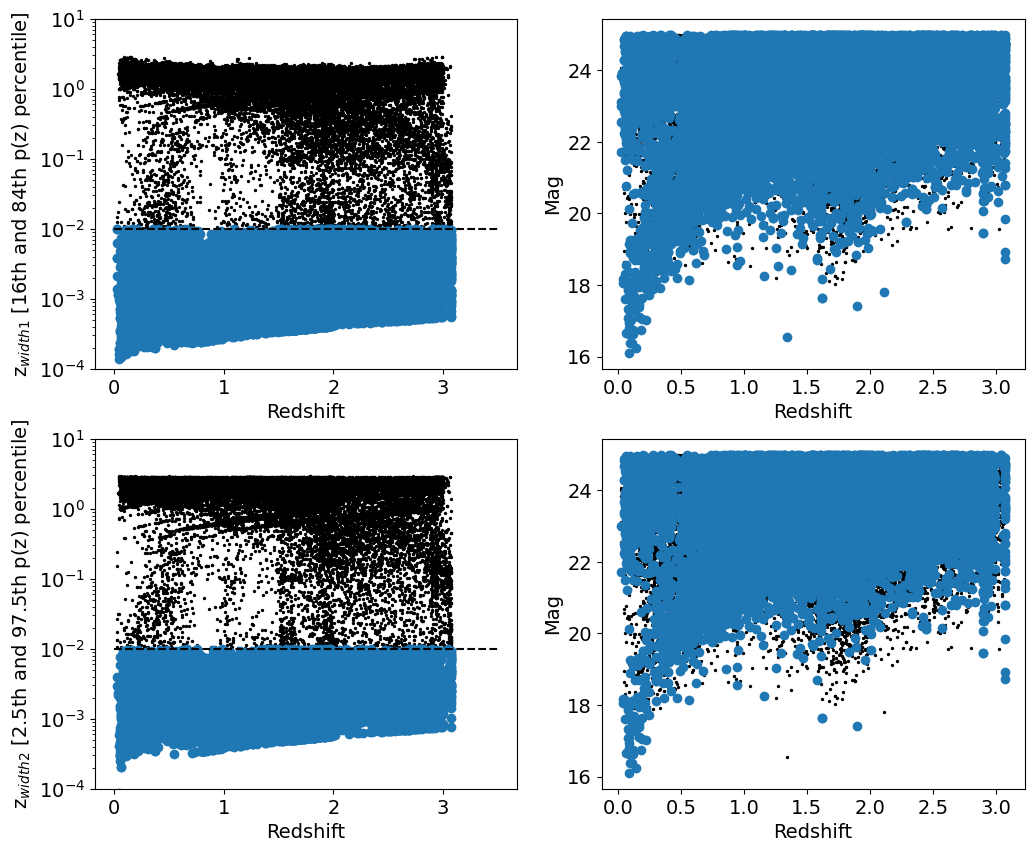

In [16]:
#plot_redshifts(all_tbl)
zfilt1,zfilt2 = plot_redshifts2(all_match_clean_tbl)

In [17]:
#z_fit = all_match_clean_tbl["REDSHIFT_1"]
#z_true = all_match_clean_tbl["REDSHIFT_2"]
z_fit = all_match_clean_tbl["REDSHIFT"]
z_true = all_match_clean_tbl["z_true"]

mag_fit  = all_match_clean_tbl["mag_auto"]
#mag_true = all_match_clean_tbl["MAG_F1600W"]
#mag_true = all_match_clean_tbl["m"]
mag_true = all_match_clean_tbl["m_new"]

filt = all_match_clean_tbl["mag_auto"] < 24

Text(0.5, 0, 'Magnitude')

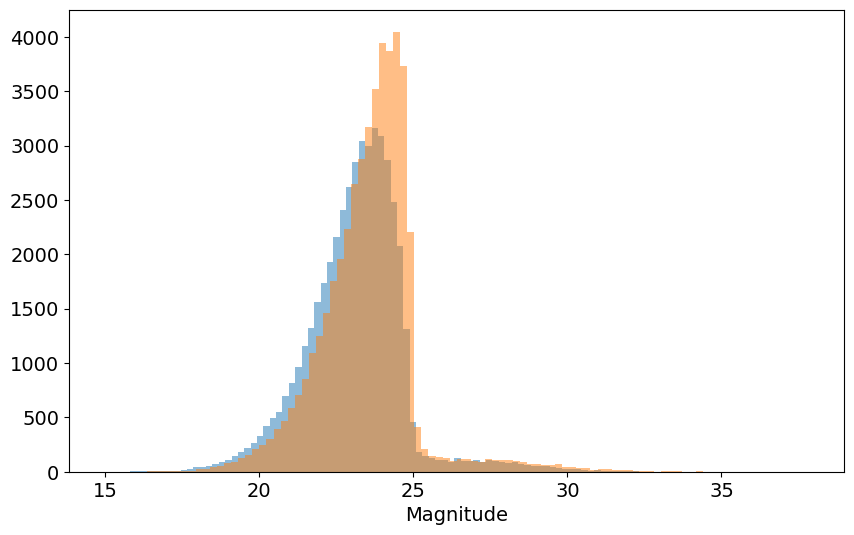

In [18]:
fig = plt.figure()
p1 = fig.add_subplot(111)
p1.hist(all_match_clean_tbl["m"],bins=100, alpha=0.5)
p1.hist(all_match_clean_tbl["m_new"],bins=100, alpha=0.5)
p1.set_xlabel("Magnitude")

Text(0.5, 0, 'True redshift')

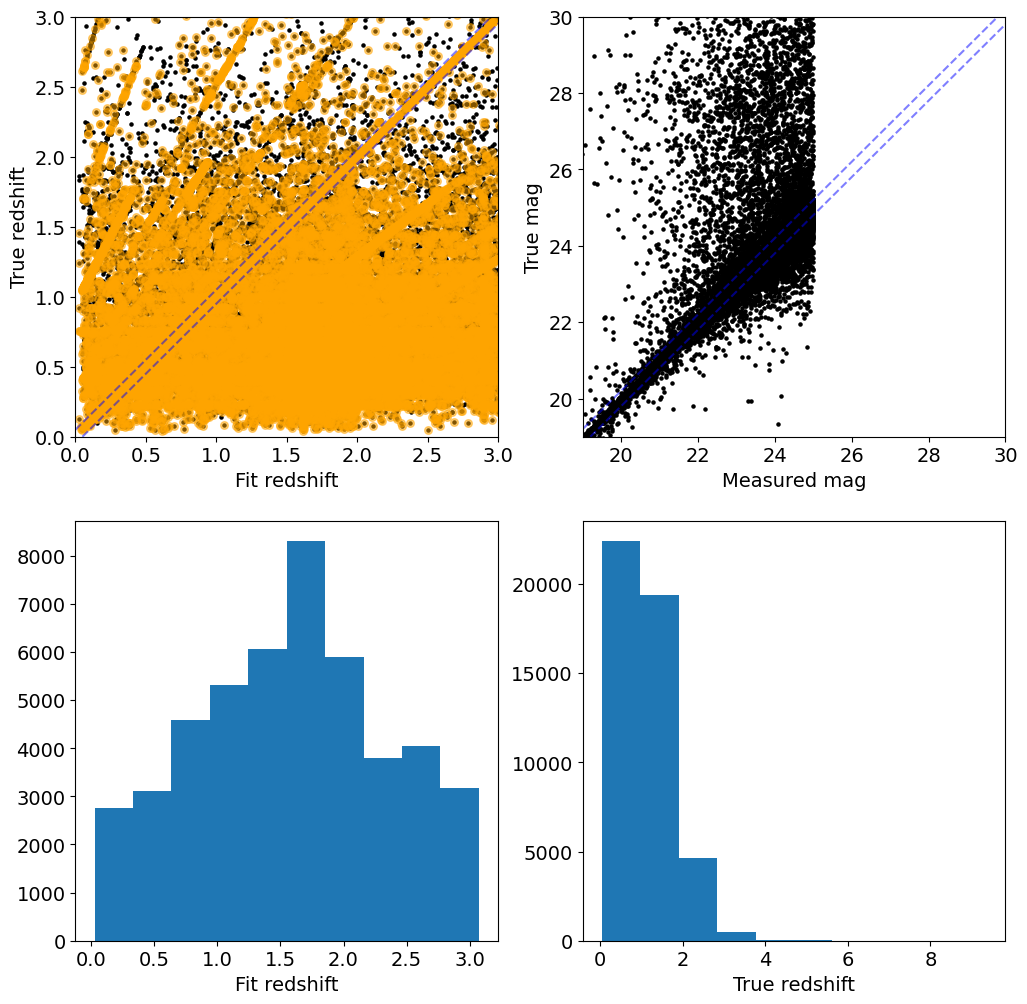

In [19]:
fig = plt.figure(figsize=(12,12))

p1 = fig.add_subplot(221)
p1.scatter(z_fit, z_true, s=5, c="k")
p1.scatter(z_fit[filt], z_true[filt], s=30, c="orange",alpha=0.5)
p1.plot([0.05,3.05],[0.0,3.0],"--",c="b",alpha=0.5)
p1.plot([0.0,3.0],[0.05,3.05],"--",c="b",alpha=0.5)
p1.set_xlim(0,3)
p1.set_ylim(0,3)
p1.set_xlabel("Fit redshift")
p1.set_ylabel("True redshift")

p2 = fig.add_subplot(222)
p2.scatter(mag_fit, mag_true, s=5, c="k")
p2.plot([19.2,30.2],[19,30],"--",c="b",alpha=0.5)
p2.plot([19,30],[19.2,30.2],"--",c="b",alpha=0.5)
p2.set_xlim(19,30)
p2.set_ylim(19,30)
p2.set_xlabel("Measured mag")
p2.set_ylabel("True mag")

p3 = fig.add_subplot(223)
p3.hist(z_fit)
p3.set_xlabel("Fit redshift")

p4 = fig.add_subplot(224)
p4.hist(z_true)
p4.set_xlabel("True redshift")

Text(0.5, 0, 'True redshift')

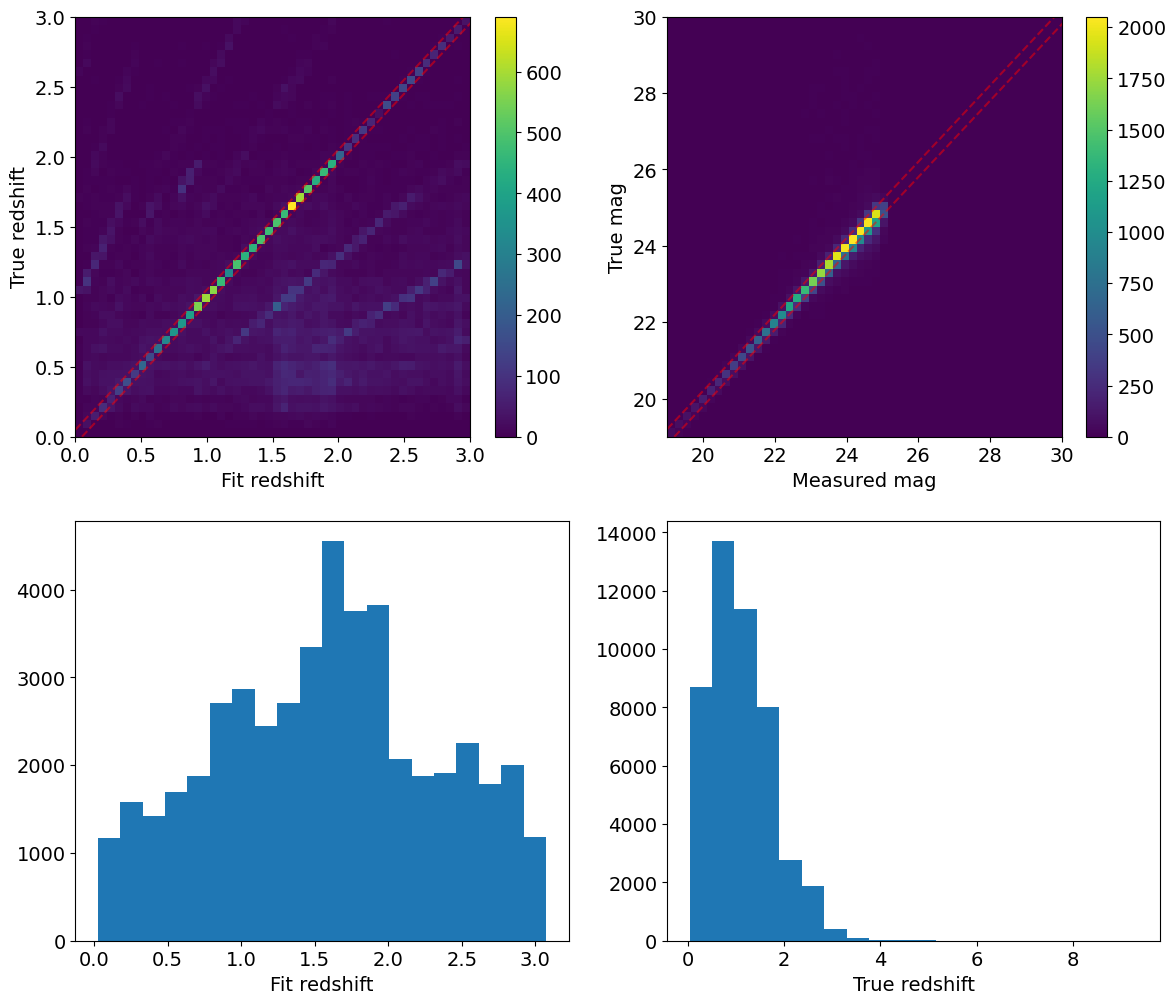

In [20]:
fig = plt.figure(figsize=(14,12))

p1 = fig.add_subplot(221)
#p1.scatter(z_fit, z_true, s=5, c="k")
#p1.scatter(z_fit[filt], z_true[filt], s=30, c="orange",alpha=0.5)
#im1 = p1.hist2d(z_fit,z_true,bins=(60,60))
im1 = p1.hist2d(z_fit, z_true, range=[[0,3],[0,3]], bins=(50,50))
p1.plot([0.05,3.05],[0.0,3.0],"--",c="r",alpha=0.5)
p1.plot([0.0,3.0],[0.05,3.05],"--",c="r",alpha=0.5)
#p1.set_xlim(0,3)
#p1.set_ylim(0,3)
p1.set_xlabel("Fit redshift")
p1.set_ylabel("True redshift")

cb1 = fig.colorbar(im1[3])

p2 = fig.add_subplot(222)
#p2.scatter(mag_fit, mag_true, s=5, c="k")
#im2 = p2.hist2d(mag_fit, mag_true, bins=(55,55))
im2 = p2.hist2d(mag_fit, mag_true, range=[[19,30],[19,30]], bins=(50,50))
p2.plot([19.2,30.2],[19,30],"--",c="r",alpha=0.5)
p2.plot([19,30],[19.2,30.2],"--",c="r",alpha=0.5)
#p2.set_xlim(19,30)
#p2.set_ylim(19,30)
p2.set_xlabel("Measured mag")
p2.set_ylabel("True mag")

cb2 = fig.colorbar(im2[3])

p3 = fig.add_subplot(223)
p3.hist(z_fit,bins=20)
p3.set_xlabel("Fit redshift")

p4 = fig.add_subplot(224)
p4.hist(z_true,bins=20)
p4.set_xlabel("True redshift")

Text(0.5, 0, 'dz')

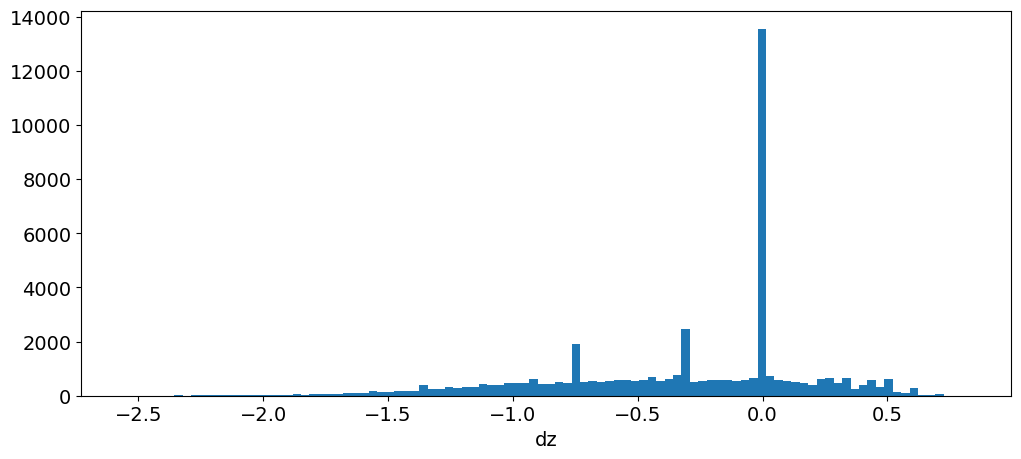

In [21]:
dz = (z_true - z_fit)/(1+z_true)

fig = plt.figure(figsize=(12,5))

p1 = fig.add_subplot(111)
p1.hist(dz,bins=100)

#p1.hist(dz,bins=1000)
#p1.set_xlim(-0.02,0.02)

p1.set_xlabel("dz")

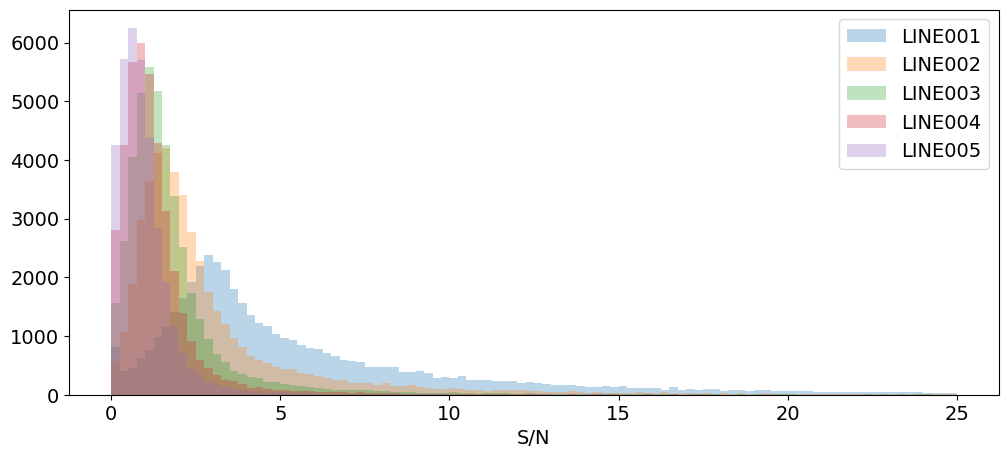

In [22]:
all_match_clean_tbl['SN001'] = all_match_clean_tbl['FLUX001']/all_match_clean_tbl['ERR001']
all_match_clean_tbl['SN002'] = all_match_clean_tbl['FLUX002']/all_match_clean_tbl['ERR002']
all_match_clean_tbl['SN003'] = all_match_clean_tbl['FLUX003']/all_match_clean_tbl['ERR003']
all_match_clean_tbl['SN004'] = all_match_clean_tbl['FLUX004']/all_match_clean_tbl['ERR004']
all_match_clean_tbl['SN005'] = all_match_clean_tbl['FLUX005']/all_match_clean_tbl['ERR005']

fig = plt.figure(figsize=(12,5))
p1 = fig.add_subplot(111)
p1.hist(all_match_clean_tbl['SN001'],bins=100,range=[0,25],label="LINE001",alpha=0.3)
p1.hist(all_match_clean_tbl['SN002'],bins=100,range=[0,25],label="LINE002",alpha=0.3)
p1.hist(all_match_clean_tbl['SN003'],bins=100,range=[0,25],label="LINE003",alpha=0.3)
p1.hist(all_match_clean_tbl['SN004'],bins=100,range=[0,25],label="LINE004",alpha=0.3)
p1.hist(all_match_clean_tbl['SN005'],bins=100,range=[0,25],label="LINE005",alpha=0.3)
p1.set_xlabel("S/N")
#p1.set_xlim(0,25)
p1.legend()

In [23]:
filt1 = all_match_clean_tbl['SN001'] > 6.5
print("Num. sources (S/N > 6.5) =",len(all_match_clean_tbl['SN001'][filt1]))

all_match_clean_sn65_tbl = all_match_clean_tbl[filt1]
print("Num. sources w/ 2 lines (S/N > 3)")
filt2 = all_match_clean_sn65_tbl['SN002'] > 3
print(len(all_match_clean_sn65_tbl[filt2]))

print("Num. sources w/ 3 lines (S/N > 3)")
filt3 = all_match_clean_sn65_tbl['SN003'] > 3
print(len(all_match_clean_sn65_tbl[filt3]))



Num. sources (S/N > 6.5) = 14612
Num. sources w/ 2 lines (S/N > 3)
7208
Num. sources w/ 3 lines (S/N > 3)
3490


In [44]:
def sample_numbers4(tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, bin_size=0.1, zmin=0, zmax=6,
                    alpha=1.0, weights=None, full_output=0, label = "all", label_dz = "z < 0.005",
                    ax=""):

    print('All sources =',len(tbl[sn_key]))

    filt = (tbl[sn_key] > sn) & (tbl["REDSHIFT"] >= zmin) & (tbl["REDSHIFT"] <= zmax)
    
    print()
    print('Num. sources (S/N > %.1f, %.1f < z < %.1f) =' % (sn,zmin,zmax),len(tbl[sn_key][filt]))

    z_fit = tbl["REDSHIFT"][filt] # sn and z filtered
    z_true = tbl["z_true"][filt]
    
    dz = (z_true - z_fit)/(1+z_true)

    dz_filt = np.abs(dz) < sigma_dz*(1+z_true)

    tbl_sn_z = tbl[filt]
    tbl_sn_z_dz = tbl_sn_z[dz_filt]
    
    print("Num. sources (dz < %.3f) =" % (sigma_dz),len(z_fit[dz_filt]))
    #print("Frac. sources (dz < %.3f) = %.4f" % (sigma_dz,len(z_fit[dzfilt])/len(z_fit)))
    print()

    bins = int((zmax-zmin)/bin_size)
    print(bins)

    plt_show = 0
    if not ax:
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        plt_show = 1


    hist, bin_edges = np.histogram(z_fit, bins=bins, range=(zmin,zmax))

    hist_dz, bin_edges_dz = np.histogram(z_fit[dz_filt], bins=bins, range=(zmin,zmax))

    bin_mid = [(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges[:-1]))]
    bin_mid_dz = [(bin_edges_dz[i]+bin_edges_dz[i+1])/2. for i in range(len(bin_edges_dz[:-1]))]


    #ax.bar(bin_edges[:-1], hist, align="edge", width=bin_size)
    #ax.bar(bin_edges_dz[:-1], hist_dz, align="edge", width=bin_size)

    #ax.bar(bin_edges_dz[:-1], hist_dz/hist, align="edge", width=bin_size)
    ax.plot(bin_mid_dz, hist_dz/hist, drawstyle="steps-mid",c="orange")
    #ax.plot(bin_edges_dz[:-1], hist_dz/hist, drawstyle="steps-pre",c="g")
    #ax.plot(bin_edges_dz[:-1], hist_dz/hist, drawstyle="steps-post",c="y")
    #ax.plot(bin_edges_dz[:-1], hist_dz/hist, drawstyle="steps-mid",c="r")

    print(hist)
    print(hist_dz)
    print(hist_dz/hist)
    print(bin_edges)
    print(bin_edges_dz)
    print(np.sum(hist))
    print(np.sum(hist_dz))

    ax.plot([zmin,zmax],[0.5,0.5],"--",lw=0.5,c="k")
    ax.plot([zmin,zmax],[0.9,0.9],"-.",lw=0.5,c="k")


    ax.set_xlabel("Redshift z")
    ax.set_ylabel("Frac")

    ax.set_ylim(0,1.1)
    ax.set_xlim(zmin,zmax)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    #ax.xaxis.set_minor_locator(ticker.MultipleLocator(bin_size))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))

    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))


    #ax.legend()

    if plt_show:
        plt.show()

    return tbl_sn_z, tbl_sn_z[dz_filt], (filt, dz_filt)

All sources = 47050

Num. sources (S/N > 6.5, 0.0 < z < 3.0) = 14580
Num. sources (dz < 0.005) = 7159

30
[ 124  172  143  167  119  136  271  452  593  877  939  638  751  768
  767  840 1139  888  711  689  354  267  293  355  387  475  348  302
  372  243]
[  2  16  12  40  57  81 185 288 426 551 551 326 421 447 464 413 604 523
 397 366 117  61  50  98 145 174 128 102  82  32]
[0.01612903 0.09302326 0.08391608 0.23952096 0.4789916  0.59558824
 0.68265683 0.63716814 0.71838111 0.62827822 0.58679446 0.51097179
 0.56058589 0.58203125 0.60495437 0.49166667 0.53028973 0.58896396
 0.5583685  0.53120464 0.33050847 0.22846442 0.17064846 0.27605634
 0.374677   0.36631579 0.36781609 0.33774834 0.22043011 0.13168724]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
14580
7159


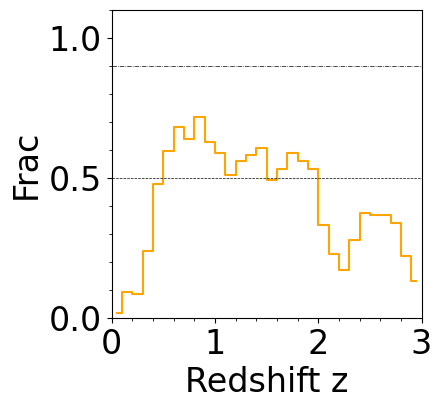

14580
7159
47050
14580


In [45]:
sample_info1 = sample_numbers4(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.1, zmin=0, zmax=3)

all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, filts  = sample_info1
all_filt, all_dz_filt = filts

print(len(all_match_clean_sn65_tbl))
print(len(all_match_clean_sn65_dz005_tbl))
print(len(all_filt))      # SN and z filt
print(len(all_dz_filt))   # dz filt

30
All sources = 47050

Num. sources (S/N > 6.5, 0.0 < z < 3.0) = 14580
Num. sources (dz < 0.005) = 7159

30
[ 124  172  143  167  119  136  271  452  593  877  939  638  751  768
  767  840 1139  888  711  689  354  267  293  355  387  475  348  302
  372  243]
[  2  16  12  40  57  81 185 288 426 551 551 326 421 447 464 413 604 523
 397 366 117  61  50  98 145 174 128 102  82  32]
[0.01612903 0.09302326 0.08391608 0.23952096 0.4789916  0.59558824
 0.68265683 0.63716814 0.71838111 0.62827822 0.58679446 0.51097179
 0.56058589 0.58203125 0.60495437 0.49166667 0.53028973 0.58896396
 0.5583685  0.53120464 0.33050847 0.22846442 0.17064846 0.27605634
 0.374677   0.36631579 0.36781609 0.33774834 0.22043011 0.13168724]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
14580
7159


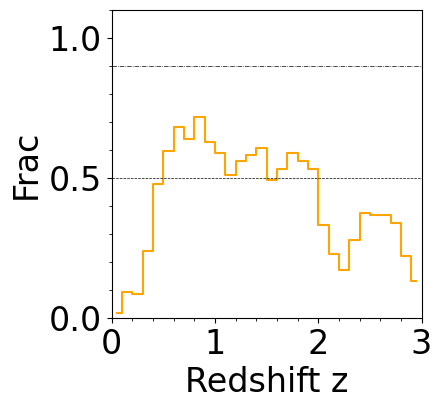

14580
7159
47050
14580
14580
7421

First histogram here:
[122. 156. 131. 127.  62.  55.  86. 164. 167. 326. 388. 312. 330. 321.
 303. 427. 535. 365. 314. 323. 237. 206. 243. 257. 242. 301. 220. 200.
 290. 211.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
7421.0
Second histogram here:
[  2.  16.  12.  40.  57.  81. 185. 288. 426. 551. 551. 326. 421. 447.
 464. 413. 604. 523. 397. 366. 117.  61.  50.  98. 145. 174. 128. 102.
  82.  32.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
7159.0

All sources = 47050

Num. sources (S/N > 6.5, 0.0 < z < 3.0) = 14580
Num. sources (dz < 0.005) = 7159

30
[ 124  172  143  167  119  136  271  452  593  877  939  638  751  768
  767  840 1139  888  711  689  354  267  293  355  387  475  348  302
  372  243]
[  2  16  12  40  57  81 185 288 426 551 551 326 421 447 464 413 604 523
 397 366 1

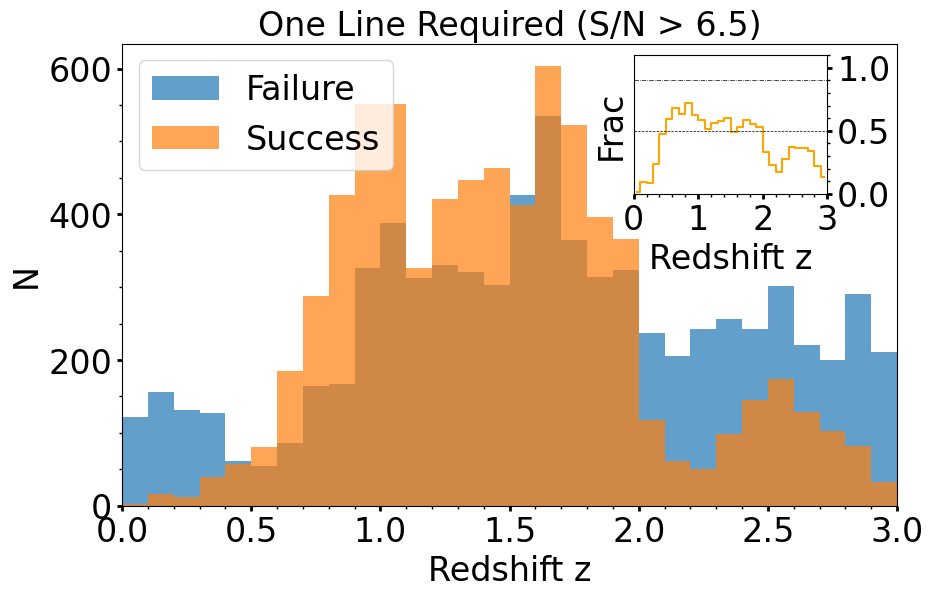

In [63]:
zmin = 0.0
zmax = 3.0
#zmax = 3.0

zinc = 0.1
bins = int((zmax-zmin)/zinc)
print(bins)

#######################

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sample_info1 = sample_numbers4(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.1, zmin=0, zmax=3)

all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, filts  = sample_info1
all_sn65_filt, all_sn65_dz_filt = filts

print(len(all_match_clean_sn65_tbl))
print(len(all_match_clean_sn65_dz005_tbl))
print(len(all_filt))      # SN and z filt
print(len(all_dz_filt))   # dz filt

all_sn65_dz_not_filt = np.logical_not(all_sn65_dz_filt)
all_match_clean_sn65_not_tbl = all_match_clean_sn65_tbl[all_sn65_dz_not_filt]
print(len(all_match_clean_sn65_tbl))
print(len(all_match_clean_sn65_not_tbl))
print()


fig = plt.figure(figsize=(10,6))

p = fig.add_subplot(111)
print("First histogram here:")
n,nbins,patches = p.hist(all_match_clean_sn65_not_tbl["REDSHIFT"],
       range=(zmin,zmax), bins=bins, alpha=0.7, label="Failure")
#n,nbins,patches = p.hist(all_match_clean_sn65_tbl["REDSHIFT"],
#       range=(zmin,zmax), bins=bins, alpha=0.7, label="All")
print(n,nbins)
print(np.sum(n))

print("Second histogram here:")
n,nbins,patches = p.hist(all_match_clean_sn65_dz005_tbl["REDSHIFT"],
       range=(zmin,zmax), bins=bins, alpha=0.7, label="Success")
print(n,nbins)
print(np.sum(n))

#p.legend()

p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_xlim(zmin,zmax)
p.set_title("One Line Required (S/N > 6.5)", fontsize=24)
#p.set_ylim(0,30)

p.xaxis.set_major_locator(MultipleLocator(0.5))
p.xaxis.set_minor_locator(MultipleLocator(0.1))
p.yaxis.set_major_locator(MultipleLocator(200))
p.yaxis.set_minor_locator(MultipleLocator(50))

p.tick_params(which='major', width=2)
p.tick_params(which='minor', width=1)

p.legend(loc="upper left")

# Create inset in data coordinates using ax.transData as transform
ax_ins = inset_axes(p, width="100%", height="100%",
                    #bbox_to_anchor=(0.68, 0.48, 0.25, 0.3),
                    #bbox_to_anchor=(0.05, 0.675, 0.25, 0.3), # left side
                    bbox_to_anchor=(0.66, 0.675, 0.25, 0.3), # right side
                    bbox_transform=p.transAxes, borderpad=0)

ax_ins.tick_params(which='both',left=False, right=True, labelleft=False, labelright=True)
ax_ins.tick_params(which='major', width=2)
ax_ins.tick_params(which='minor', width=1)

print()
sample_info1 = sample_numbers4(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, 
                               alpha=0.7, bin_size=zinc, zmin=zmin, zmax=zmax, ax=ax_ins)
    

#all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, filts = sample_info1
#all_filt, all_dz_filt = filts

#print(len(all_match_clean_sn65_tbl))
#print(len(all_match_clean_sn65_dz005_tbl))
#print(len(all_filt))      # SN and z filt
#print(len(all_dz_filt))   # dz filt

plt.show()

30
All sources = 14580

Num. sources (S/N > 3.0, 0.0 < z < 3.0) = 7186
Num. sources (dz < 0.005) = 5259

30
[ 26  53  32  80  75  79 177 223 299 329 393 198 310 343 396 459 733 564
 445 437 170 106 117 162 183 222 166 145 191  73]
[  1  14   9  32  40  66 151 206 261 282 269 136 245 280 334 322 500 468
 370 350 114  57  48  94 135 163 124  98  74  16]
[0.03846154 0.26415094 0.28125    0.4        0.53333333 0.83544304
 0.85310734 0.92376682 0.8729097  0.85714286 0.68447837 0.68686869
 0.79032258 0.81632653 0.84343434 0.70152505 0.68212824 0.82978723
 0.83146067 0.80091533 0.67058824 0.53773585 0.41025641 0.58024691
 0.73770492 0.73423423 0.74698795 0.67586207 0.38743455 0.21917808]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
7186
5259


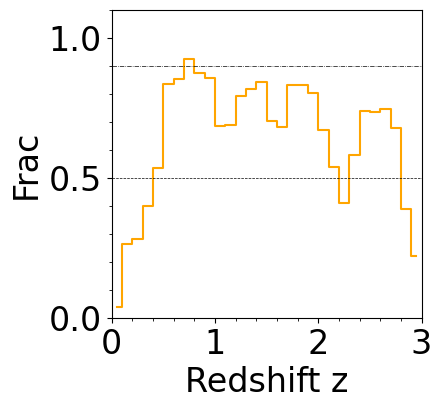

7186
5259
47050
14580

7186
1927

First histogram here:
[ 25.  39.  23.  48.  35.  13.  26.  17.  38.  47. 124.  62.  65.  63.
  62. 137. 233.  96.  75.  87.  56.  49.  69.  68.  48.  59.  42.  47.
 117.  57.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
1927.0
Second histogram here:
[  1.  14.   9.  32.  40.  66. 151. 206. 261. 282. 269. 136. 245. 280.
 334. 322. 500. 468. 370. 350. 114.  57.  48.  94. 135. 163. 124.  98.
  74.  16.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
5259.0

All sources = 14580

Num. sources (S/N > 3.0, 0.0 < z < 3.0) = 7186
Num. sources (dz < 0.005) = 5259

30
[ 26  53  32  80  75  79 177 223 299 329 393 198 310 343 396 459 733 564
 445 437 170 106 117 162 183 222 166 145 191  73]
[  1  14   9  32  40  66 151 206 261 282 269 136 245 280 334 322 500 468
 370 350 114  57  48  94 135 163 124  98  7

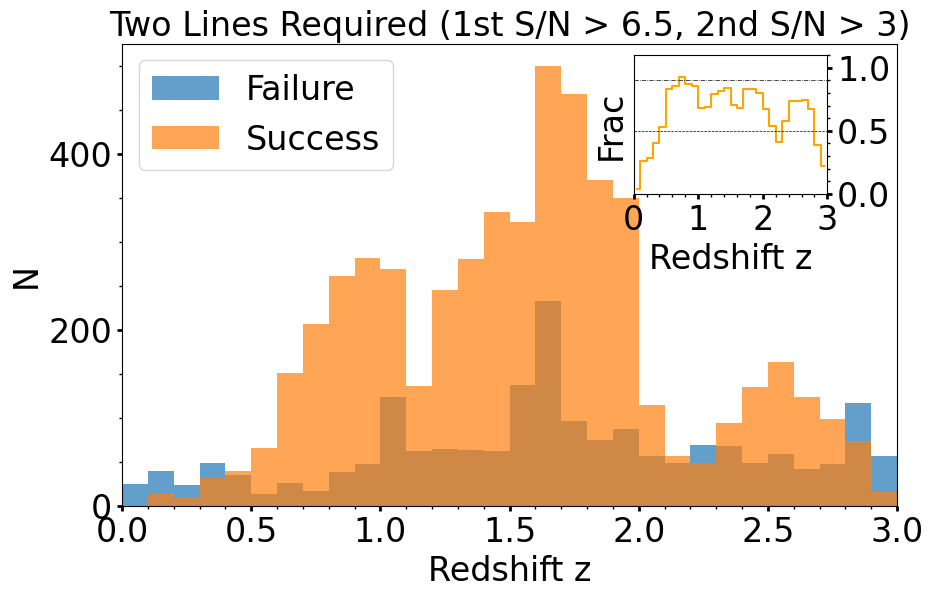

In [64]:
# zmin = 0.0
zmax = 3.0
#zmax = 3.0

zinc = 0.1
bins = int((zmax-zmin)/zinc)
print(bins)

#######################

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sample_info1 = sample_numbers4(all_match_clean_sn65_tbl, sn_key='SN002', sn=3.0, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.1, zmin=0, zmax=3)

all_match_clean_sn65_sn3_tbl, all_match_clean_sn65_sn3_dz005_tbl, filts  = sample_info1
all_sn3_filt, all_sn3_dz_filt = filts

print(len(all_match_clean_sn65_sn3_tbl))
print(len(all_match_clean_sn65_sn3_dz005_tbl))
print(len(all_filt))      # SN and z filt
print(len(all_dz_filt))   # dz filt
print()

all_sn3_dz_not_filt = np.logical_not(all_sn3_dz_filt)
all_match_clean_sn65_sn3_not_tbl = all_match_clean_sn65_sn3_tbl[all_sn3_dz_not_filt]
print(len(all_match_clean_sn65_sn3_tbl))
print(len(all_match_clean_sn65_sn3_not_tbl))
print()


fig = plt.figure(figsize=(10,6))

p = fig.add_subplot(111)
print("First histogram here:")
n,nbins,patches = p.hist(all_match_clean_sn65_sn3_not_tbl["REDSHIFT"],
       range=(zmin,zmax), bins=bins, alpha=0.7, label="Failure")
#n,nbins,patches = p.hist(all_match_clean_sn65_tbl["REDSHIFT"],
#       range=(zmin,zmax), bins=bins, alpha=0.7, label="All")
print(n,nbins)
print(np.sum(n))

print("Second histogram here:")
n,nbins,patches = p.hist(all_match_clean_sn65_sn3_dz005_tbl["REDSHIFT"],
       range=(zmin,zmax), bins=bins, alpha=0.7, label="Success")
print(n,nbins)
print(np.sum(n))

#p.legend()

p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_xlim(zmin,zmax)
p.set_title("Two Lines Required (1st S/N > 6.5, 2nd S/N > 3)", fontsize=24)
#p.set_ylim(0,30)
p.xaxis.set_major_locator(MultipleLocator(0.5))
p.xaxis.set_minor_locator(MultipleLocator(0.1))
p.yaxis.set_major_locator(MultipleLocator(200))
p.yaxis.set_minor_locator(MultipleLocator(50))

#p.xaxis.set_tick_params(width=2)
#p.yaxis.set_tick_params(width=2)

p.tick_params(which='major', width=2)
p.tick_params(which='minor', width=1)




p.legend(loc="upper left")

# Create inset in data coordinates using ax.transData as transform
ax_ins = inset_axes(p, width="100%", height="100%",
                    #bbox_to_anchor=(0.68, 0.48, 0.25, 0.3),
                    #bbox_to_anchor=(0.05, 0.675, 0.25, 0.3), # left side
                    bbox_to_anchor=(0.66, 0.675, 0.25, 0.3), # right side
                    bbox_transform=p.transAxes, borderpad=0)

ax_ins.tick_params(which='both',left=False, right=True, labelleft=False, labelright=True)
ax_ins.tick_params(which='major', width=2)
ax_ins.tick_params(which='minor', width=1)

print()
sample_info1 = sample_numbers4(all_match_clean_sn65_tbl, sn_key='SN002', sn=3.0, sigma_dz=0.005, 
                               alpha=0.7, bin_size=zinc, zmin=zmin, zmax=zmax, ax=ax_ins)
    
#all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, filts = sample_info1
#all_filt, all_dz_filt = filts

#print(len(all_match_clean_sn65_tbl))
#print(len(all_match_clean_sn65_dz005_tbl))
#print(len(all_filt))      # SN and z filt
#print(len(all_dz_filt))   # dz filt

plt.show()

Text(0.5, 0, 'dz')

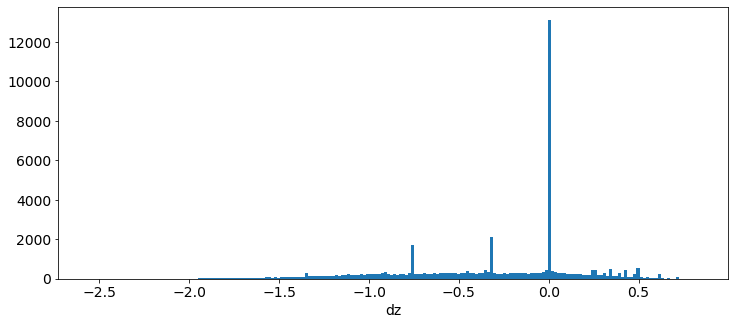

In [31]:
fig = plt.figure(figsize=(12,5))

p1 = fig.add_subplot(111)
#p1.hist(dz,bins=100)

p1.hist(dz,bins=200)
#p1.set_xlim(-0.02,0.02)

p1.set_xlabel("dz")

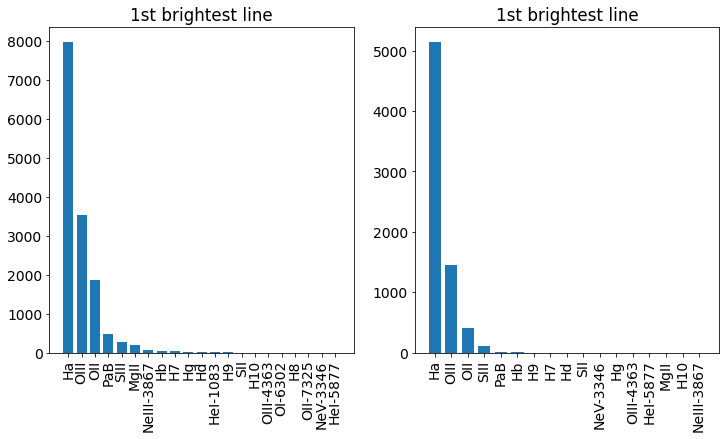

In [32]:
# Everything that it thinks has a line
#emline_bar_chart2(all_match_clean_tbl['LINE001'],all_match_clean_sn65_dz005_tbl['LINE001'], 
#                  title = "1st brightest line")

# Everything that has a line S/N > 6.5
emline_bar_chart2(all_match_clean_sn65_tbl['LINE001'],all_match_clean_sn65_dz005_tbl['LINE001'], 
                  title = "1st brightest line")

#emline_bar_chart(all_match_clean_tbl['LINE001'],title = "1st brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE002'],title = "2nd brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE003'],title = "3rd brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE004'],title = "4th brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE005'],title = "5th brightest line")

In [33]:
print("All sources")
print(len(all_match_tbl))
print()

print("Sources matched with a radius <0.4")
#clean_filt
all_match_clean_tbl
print(len(all_match_clean_tbl))

#all_clean_not_filt = np.logical_not(all_clean_filt)
#all_match_clean_not_tbl = all_match_tbl[all_clean_not_filt]
#print(len(all_match_clean_not_tbl))
print()

print("Sources with line S/N > 6.5")
all_sn65_filt
all_match_clean_sn65_tbl
print(len(all_match_clean_sn65_tbl))

all_sn65_not_filt = np.logical_not(all_sn65_filt)
all_match_clean_sn65_not_tbl = all_match_clean_tbl[all_sn65_not_filt]
print(len(all_match_clean_sn65_not_tbl))
print()

print("Sources with line S/N > 6.5 within z < 0.005*(1+z)")
all_sn65_dz_filt
all_match_clean_sn65_dz005_tbl
print(len(all_match_clean_sn65_dz005_tbl))

all_sn65_dz_not_filt = np.logical_not(all_sn65_dz_filt)
all_match_clean_sn65_dz005_not_tbl = all_match_clean_sn65_tbl[all_sn65_dz_not_filt]
print(len(all_match_clean_sn65_dz005_not_tbl))

All sources
328202

Sources matched with a radius <0.4
47050

Sources with line S/N > 6.5
14580
32470

Sources with line S/N > 6.5 within z < 0.005*(1+z)
7159
7421


In [34]:
print(os.getcwd())

/local/RomanSims/grizli/sims/hlss_single_v5/Extractions


In [ ]:
#all_match_tbl.write("match.fits")
#all_match_clean_tbl.write("match_clean.fits") # on the order of MB 

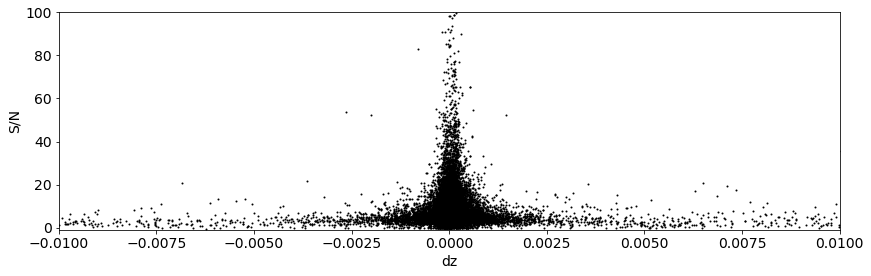

In [35]:
sn_dz_plot(all_match_clean_tbl)

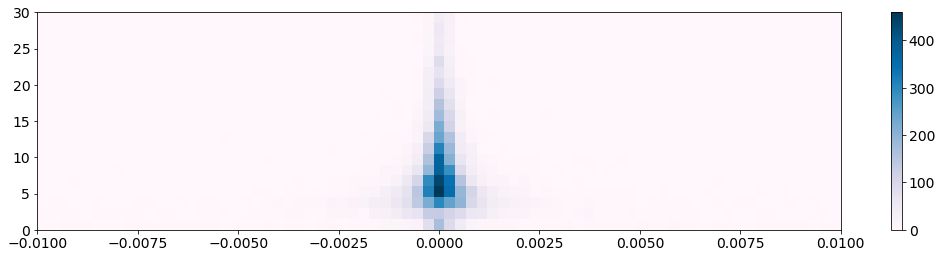

In [36]:
sn_dz_hist2d_plot(all_match_clean_tbl)

In [37]:
#print(all_match_clean_tbl['id'])
#print(all_match_clean_sn65_tbl['id'])
print(all_match_clean_sn65_dz005_tbl['id'])

 id 
----
  31
  35
  45
  97
 112
 113
 ...
2217
2228
2234
2235
2242
2247
2255
Length = 7159 rows


In [38]:
#print(all_match_clean_not_tbl['id'])
#print(all_match_clean_sn65_not_tbl['id'])
print(all_match_clean_sn65_dz005_not_tbl['id'])

 id 
----
  21
  25
  28
  30
  34
  36
 ...
2163
2165
2191
2214
2227
2239
2251
Length = 7421 rows


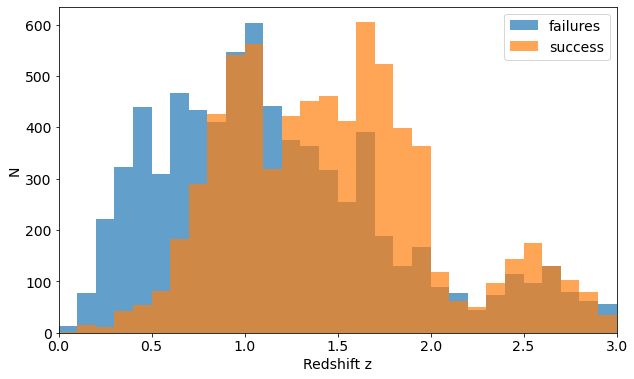

In [39]:
fig = plt.figure(figsize=(10,6))
p = fig.add_subplot(111)
#p.hist(all_match_clean_sn65_dz005_not_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="failures")
#p.hist(all_match_clean_sn65_dz005_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="matches")
p.hist(all_match_clean_sn65_dz005_not_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="failures")
p.hist(all_match_clean_sn65_dz005_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="success")
p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_xlim(0,3)
#p.set_ylim(0,30)
p.legend()

(16.0, 32.0)

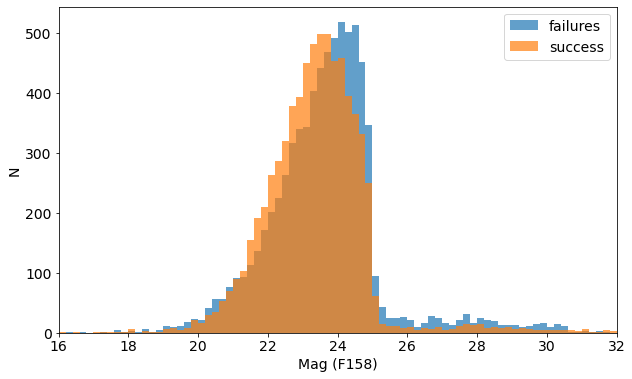

In [40]:
fig = plt.figure(figsize=(10,6))
p = fig.add_subplot(111)
#p.hist(all_match_clean_sn65_dz005_not_tbl['MAG_F1600W'],
#       range=(16,32), bins=16*5, alpha=0.7, label="failures")
#p.hist(all_match_clean_sn65_dz005_tbl['MAG_F1600W'],
#       range=(16,32), bins=16*5, alpha=0.7, label="matches")
p.hist(all_match_clean_sn65_dz005_not_tbl['m_new'],
       range=(16,32), bins=16*5, alpha=0.7, label="failures")
p.hist(all_match_clean_sn65_dz005_tbl['m_new'],
       range=(16,32), bins=16*5, alpha=0.7, label="success")
p.legend()
p.set_xlabel("Mag (F158)")
p.set_ylabel("N")
p.set_xlim(16,32)
#p.set_ylim(0,20)

In [41]:
mag_cut = 24

print("All sources")
print(len(all_match_tbl))
filt = all_match_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_tbl[filt]))
print()

print("Sources matched with a search radius <0.4")
#clean_filt
#all_match_clean_tbl
print(len(all_match_clean_tbl))
filt = all_match_clean_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_tbl[filt]))
print()

print("Sources with line S/N > 6.5")
print(len(all_match_clean_sn65_tbl))
filt = all_match_clean_sn65_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_sn65_tbl[filt]))
print()

#print(len(all_match_clean_sn65_not_tbl))
#filt = all_match_clean_sn65_not_tbl['MAG_AUTO'] < mag_cut
#print(len(all_match_clean_sn65_not_tbl[filt]))
#print()

print("Sources with line S/N > 6.5 within z < 0.005*(1+z)")
print(len(all_match_clean_sn65_dz005_tbl))
filt = all_match_clean_sn65_dz005_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_sn65_dz005_tbl[filt]))
print()

#print(len(all_match_clean_sn65_dz005_not_tbl))
#filt = all_match_clean_sn65_dz005_not_tbl['MAG_AUTO'] < mag_cut
#print(len(all_match_clean_sn65_dz005_not_tbl[filt]))
#print()

All sources
328202
Sources m < 24
201105

Sources matched with a search radius <0.4
47050
Sources m < 24
28530

Sources with line S/N > 6.5
14580
Sources m < 24
9961

Sources with line S/N > 6.5 within z < 0.005*(1+z)
7159
Sources m < 24
5226



In [42]:
print(os.getcwd())
os.chdir(os.path.join(LOCAL_PATH, root, 'Extractions'))
print(os.getcwd())

/local/RomanSims/grizli/sims/hlss_single_v5/Extractions
/local/RomanSims/grizli/sims/hlss_single_v5/Extractions


In [43]:
print(all_match_clean_sn65_dz005_tbl.colnames)

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

   ra       dec     id  z_true mag_auto REDSHIFT LINE001 SN001  LINE002 SN002 
  deg       deg                  uJy                                          
-------- --------- ---- ------ -------- -------- ------- ------ ------- ------
9.079571 -0.998221   31  1.333   23.652    1.333    OIII  9.110      Ha 12.272
9.092333 -0.997352   45  1.010   22.593    1.017    OIII 21.899      Hb 18.521
9.072293 -0.993046   97  1.082   22.972    1.083      Ha 14.564    SIII  3.113
9.025364 -0.992410  112  1.438   22.516    1.437      Ha  9.069      Hg  2.153
9.112106 -0.991635  127  1.722   24.635    1.723    OIII  8.593      Ha  7.173
9.052379 -0.989575  182  1.687   22.864    1.687      Ha  8.495     OII  2.635
     ...       ...  ...    ...      ...      ...     ...    ...     ...    ...
9.429712 -0.127328 2206  1.465   22.660    1.466    OIII  6.526      Ha  7.180
9.394897 -0.126376 2228  1.327   22.845    1.327      Ha 25.856    OIII  8.621
9.395502 -0.125952 2234  1.295   22.141    1.294    

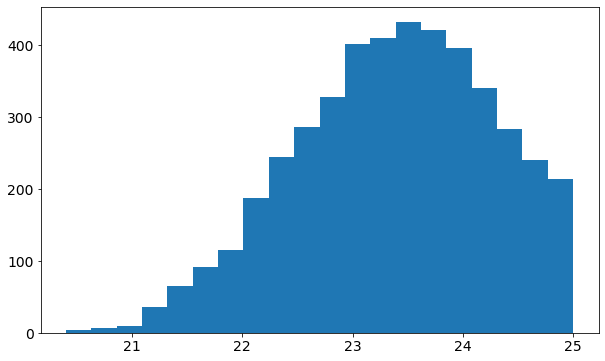

In [44]:
tbl = all_match_clean_sn65_dz005_tbl

filt = (tbl["REDSHIFT"] > 1.0) & (tbl["REDSHIFT"] < 2.0)

tbl['ra'].info.format = '.6f'
tbl['dec'].info.format = '.6f'

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002"]:
    tbl[col].info.format = '.3f'
    
print(tbl['ra','dec','id','z_true','mag_auto',"REDSHIFT","LINE001","SN001","LINE002","SN002"][filt])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(tbl['mag_auto'][filt],bins=20)
plt.show()

   ra       dec     id  z_true mag_auto REDSHIFT LINE001 SN001  LINE002 SN002 
  deg       deg                  uJy                                          
-------- --------- ---- ------ -------- -------- ------- ------ ------- ------
9.053157 -0.998077   35  2.041   24.767    2.041    OIII 15.132     OII  6.466
9.030741 -0.976632  418  2.731   23.944    2.729     OII 24.956    OIII 15.787
9.106591 -0.973922  479  2.554   23.981    2.553    OIII  9.029     OII  7.459
9.106591 -0.973922  479  2.554   23.981    2.553    OIII  9.029     OII  7.459
9.079102 -0.972394  510  2.005   24.932    2.005    OIII  8.077     OII  3.298
9.100271 -0.964459  640  2.539   23.728    2.539    OIII  9.203     OII 11.532
     ...       ...  ...    ...      ...      ...     ...    ...     ...    ...
9.444864 -0.142348 1918  2.413   24.409    2.412    OIII  8.115     OII  6.539
9.458326 -0.140785 1945  2.655   24.094    2.655    OIII 45.601     OII 51.600
9.394481 -0.139324 1962  2.525   23.771    2.526    

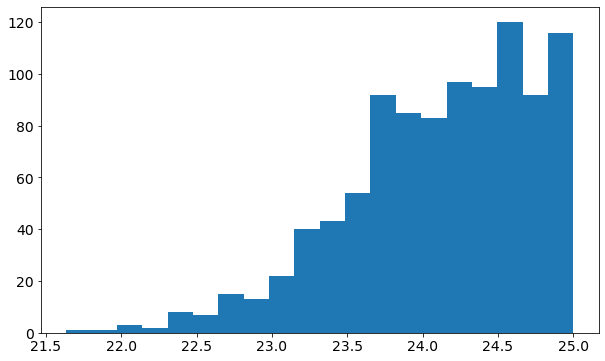

In [45]:
tbl = all_match_clean_sn65_dz005_tbl

filt = (tbl["REDSHIFT"] > 2.0) & (tbl["REDSHIFT"] < 3.0)

tbl['ra'].info.format = '.6f'
tbl['dec'].info.format = '.6f'

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002"]:
    tbl[col].info.format = '.3f'
    
print(tbl['ra','dec','id','z_true','mag_auto',"REDSHIFT","LINE001","SN001","LINE002","SN002"][filt])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(tbl['mag_auto'][filt],bins=20)
plt.show()


In [ ]:
r0,d0 = 9.170514, -0.848475 # 20.97  Ha (good!!!)

dr = np.sqrt((all_match_tbl['ra']-r0)**2*np.cos(d0/180*np.pi)**2 + 
             (all_match_tbl['dec']-d0)**2)*3600.
id = all_match_tbl['number'][np.argmin(dr)]
obj_mag = all_match_tbl['mag_auto'][np.argmin(dr)]
print('ID:%d, mag=%.2f, dr=%.2f"' %(id, obj_mag, np.min(dr)))

In [47]:
tbl = all_match_clean_sn65_dz005_tbl

filt = (tbl["REDSHIFT"] > 2.1) & (tbl["REDSHIFT"] < 2.3)
#filt = (tbl["REDSHIFT"] > 2.0) & (tbl["REDSHIFT"] < 2.5)

tbl['ra'].info.format = '.6f'
tbl['dec'].info.format = '.6f'

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002"]:
    tbl[col].info.format = '.3f'
    
print(tbl['ra','dec','id','z_true','mag_auto',"REDSHIFT","LINE001","SN001","LINE002","SN002"][filt])

   ra       dec     id  z_true mag_auto ... SN001  LINE002 SN002    FIELD   
  deg       deg                  uJy    ...                                 
-------- --------- ---- ------ -------- ... ------ ------- ------ ----------
9.092478 -0.912975 1561  2.220   24.629 ... 11.351     OII  9.540 field_0001
9.033453 -0.910271 1618  2.233   23.456 ... 15.370    OIII 11.008 field_0001
9.051436 -0.906757 1683  2.193   24.340 ... 12.227     OII 10.123 field_0001
9.075908 -0.890770 1980  2.108   23.161 ...  7.200    OIII  5.973 field_0001
9.082679 -0.861613  218  2.218   24.818 ...  8.323    OIII  6.184 field_0002
9.033590 -0.851838  405  2.217   22.881 ... 12.129      H8  4.574 field_0002
     ...       ...  ...    ...      ... ...    ...     ...    ...        ...
9.382660 -0.328487  756  2.129   24.149 ...  7.264     OII  6.036 field_0054
9.432829 -0.309810 1068  2.284   23.381 ...  6.890     OII  4.406 field_0054
9.381304 -0.302998 1180  2.120   24.576 ... 11.609     OII  8.330 field_0054

z_true mag_auto REDSHIFT m_new     d2d   
         uJy                       deg   
------ -------- -------- ------ ---------
 2.193   24.340    2.192 24.324 4.667e-05
 1.078   22.090    1.099 22.137 4.017e-05
 1.087   22.986    1.087 22.943 4.545e-05
 0.927   24.805    0.998 24.781 4.130e-05
 1.243   24.289    2.882 24.282 3.547e-05
 0.441   23.701    1.057 23.642 3.931e-05
   ...      ...      ...    ...       ...
 1.024   21.597    0.388 21.557 4.398e-05
 0.910   23.377    1.924 23.396 4.523e-05
 1.072   24.506    1.415 24.341 5.732e-05
 1.371   23.423    1.730 23.450 4.151e-05
 1.217   23.908    1.217 23.963 4.132e-05
 0.436   23.408    2.933 23.418 4.360e-05
Length = 21 rows
[0.16799487 0.14459972 0.16361815 0.14869421 0.12768403 0.14152233
 0.15651208 0.19455374 0.14441041 0.15114186 0.16242011 0.15290445
 0.16615912 0.16401373 0.15397607 0.15833797 0.16283921 0.20635909
 0.14942448 0.14876711 0.15695026] arcsec
LINE001 SN001   LINE002   SN002 
------- ------ ---------- ------
  

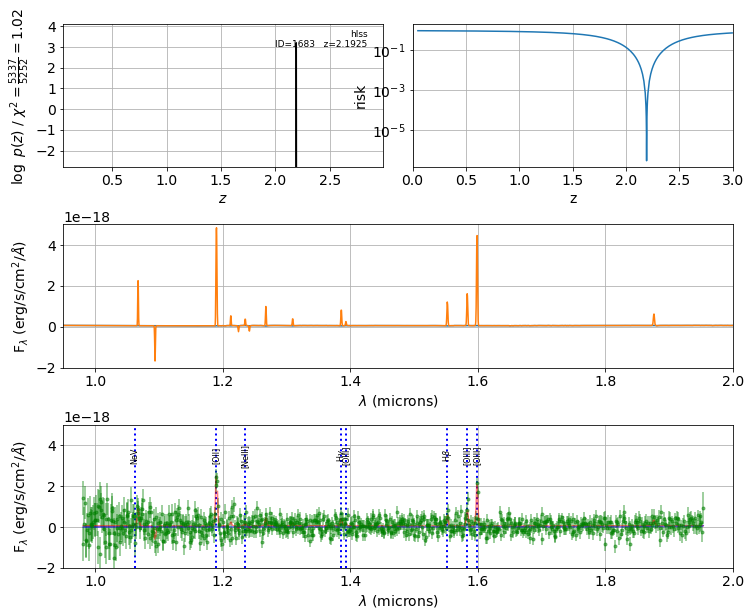

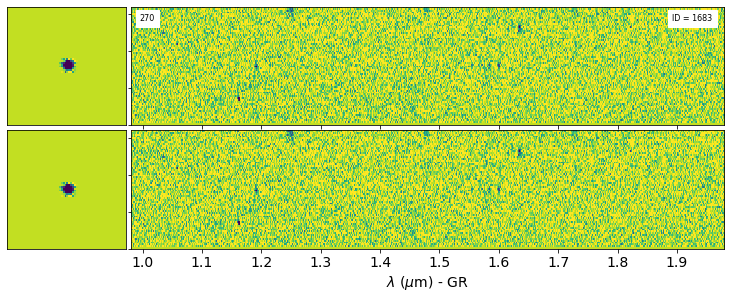

In [56]:
id = 1683
tbl = all_match_clean_tbl

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002","m_new"]:
    tbl[col].info.format = '.3f'
tbl['d2d'].info.format = '.3e'    
    

filt = tbl['id'] == id
print(tbl['z_true','mag_auto',"REDSHIFT",'m_new','d2d'][filt])
print(tbl['d2d'][filt].to(u.arcsec))
print(tbl["LINE001","SN001","LINE002","SN002",][filt])
z_in = tbl["z_true"][filt][0]
#z_in = tbl["REDSHIFT"][filt][0]

#display_grizli("my_roman_sims", id, w0=0.95, w1=2.0)
display_grizli("hlss", id, w0=0.95, w1=2.0, z_in=z_in, y0=-2e-18, y1=5e-18,path=tbl["FIELD"][filt][0])

In [ ]:
print(dir())
#print(__dict__)